In [87]:
import pickle

CPU_ARCH = "x86_64"
EMBEDDING_PATH = "./dataset_embedding/"

In [88]:
with open(f"{EMBEDDING_PATH}{CPU_ARCH}_probability_after_cluster.pickle", "rb") as f:
    prob_after_cluster = pickle.load(f)
    f.close()
with open(f"{EMBEDDING_PATH}{CPU_ARCH}_probability_before_cluster.pickle", "rb") as f:
    prob_before_cluster = pickle.load(f)
    f.close()
with open(f"{EMBEDDING_PATH}{CPU_ARCH}_pred_y_after_cluster.pickle", "rb") as f:
    pred_y_after_cluster = pickle.load(f)
    f.close()
with open(f"{EMBEDDING_PATH}{CPU_ARCH}_pred_y_before_cluster.pickle", "rb") as f:
    pred_y_before_cluster = pickle.load(f)
    f.close()

with open(f"{EMBEDDING_PATH}{CPU_ARCH}_label_mapping.pickle", "rb") as f:
    label_mapping = pickle.load(f)
    f.close()

with open(f"{EMBEDDING_PATH}{CPU_ARCH}_label_mapping_new.pickle", "rb") as f:
    new_label_mapping = pickle.load(f)
    f.close()
with open(f"{EMBEDDING_PATH}{CPU_ARCH}_y_test.pickle", "rb") as f:
    y_test = pickle.load(f)
    f.close()


In [89]:
import numpy as np

print(prob_after_cluster.shape)
print(prob_before_cluster.shape)



prob_after_cluster_np = prob_after_cluster.detach().numpy()
prob_before_cluster_np = prob_before_cluster.detach().numpy()
pred_y_after_cluster_np = pred_y_after_cluster.detach().numpy()
pred_y_before_cluster_np = pred_y_before_cluster.detach().numpy()

torch.Size([300, 23])
torch.Size([300, 10])


In [90]:
print(prob_before_cluster)
print(label_mapping)
print(new_label_mapping)

tensor([[-4.0894e-02, -1.5996e+01, -1.7095e+01,  ..., -1.1975e+01,
         -1.2847e+01, -3.2174e+00],
        [-5.0995e-02, -1.5293e+01, -1.6233e+01,  ..., -1.1408e+01,
         -1.1989e+01, -3.0018e+00],
        [-1.0419e-02, -1.6710e+01, -1.6967e+01,  ..., -1.0631e+01,
         -1.3717e+01, -4.5719e+00],
        ...,
        [-4.6532e+00, -1.6421e+01, -1.7599e+01,  ..., -1.7642e+01,
         -1.2966e+01, -9.6569e-03],
        [-5.2882e+00, -1.6789e+01, -1.8149e+01,  ..., -1.8354e+01,
         -1.3233e+01, -5.1299e-03],
        [-5.2882e+00, -1.6789e+01, -1.8149e+01,  ..., -1.8354e+01,
         -1.3233e+01, -5.1299e-03]], requires_grad=True)
{0: 'camelot', 1: 'gafgyt', 2: 'meterpreter', 3: 'mirai', 4: 'ngioweb', 5: 'rekoobe', 6: 'sliver', 7: 'sshdoor', 8: 'tsunami', 9: 'xmrig'}
defaultdict(<class 'list'>, {'camelot': [0, 1, 2], 'gafgyt': [3, 4], 'meterpreter': [5, 6], 'mirai': [7, 8], 'ngioweb': [9], 'rekoobe': [10, 11, 12, 13], 'sliver': [14], 'sshdoor': [15, 16, 17], 'tsunami': [18

In [91]:
# normalize
min_prob_before = np.min(prob_before_cluster_np, axis=1)[:, np.newaxis]
min_prob_after = np.min(prob_after_cluster_np, axis=1)[:, np.newaxis]

prob_before_cluster_norm = prob_before_cluster_np - min_prob_before + 1
prob_after_cluster_norm = prob_after_cluster_np - min_prob_after + 1

prob_after_cluster_norm = prob_after_cluster_norm / np.sum(prob_after_cluster_norm, axis=1)[:, np.newaxis]
prob_before_cluster_norm = prob_before_cluster_norm / np.sum(prob_before_cluster_norm, axis=1)[:, np.newaxis]

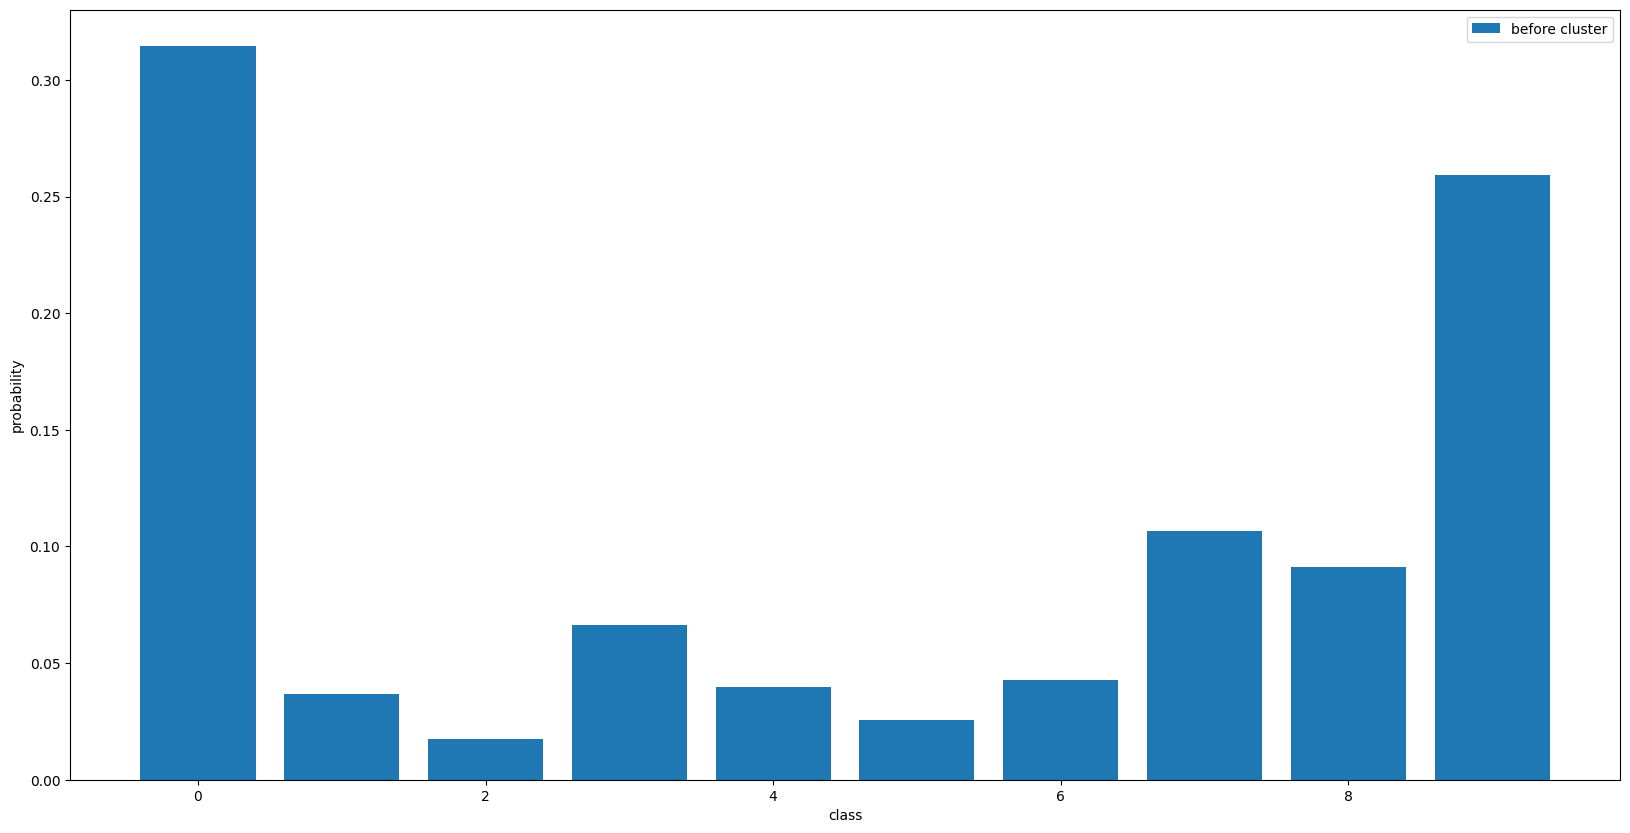

[ -0.04089371 -15.996023   -17.095314   -14.281432   -15.815707
 -16.615326   -15.642392   -11.974989   -12.847472    -3.217406  ]


In [92]:
import matplotlib.pyplot as plt

fig= plt.subplots(figsize=(20, 10))

plt.bar(range(prob_before_cluster_norm.shape[1]), prob_before_cluster_norm[0, :], label="before cluster")
plt.xlabel("class")
plt.ylabel("probability")
plt.legend()
plt.show()

print(prob_before_cluster_np[0, :])

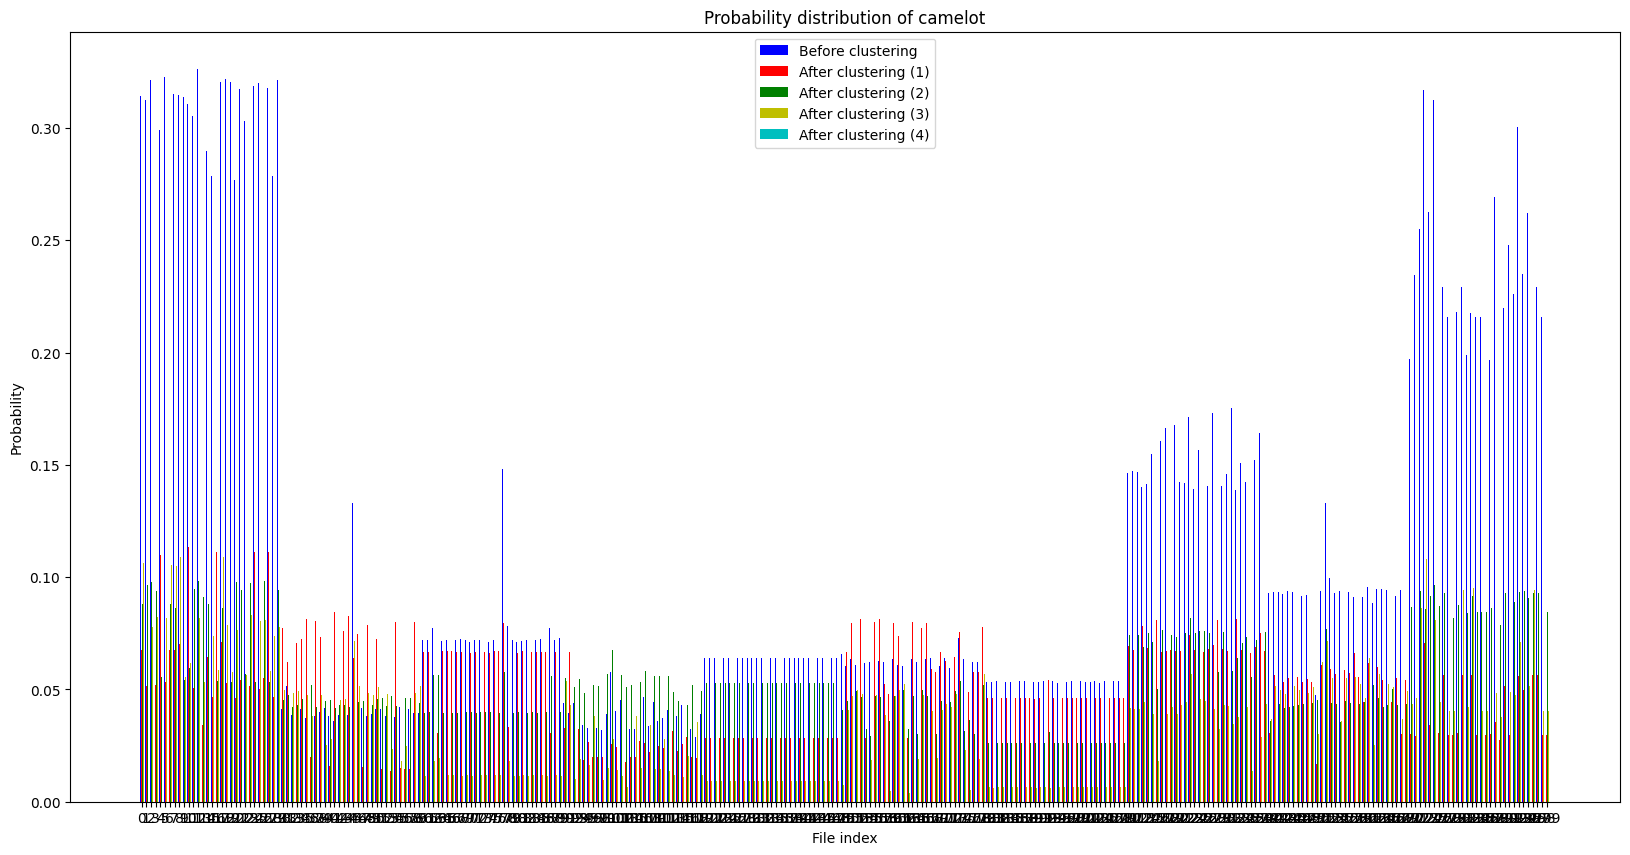

In [208]:
import matplotlib.pyplot as plt


barWidth = 1/6

for key in label_mapping:

    x1 = [prob[key] for i, prob in enumerate(prob_before_cluster_norm)]
    x2 = [0 for i in range(prob_after_cluster_norm.shape[0])]
    x3 = [0 for i in range(prob_after_cluster_norm.shape[0])]
    x4 = [0 for i in range(prob_after_cluster_norm.shape[0])]
    x5 = [0 for i in range(prob_after_cluster_norm.shape[0])]
    for i, prob in enumerate(prob_after_cluster_norm):
        for k, index in enumerate(new_label_mapping[label_mapping[key]]):
            if k == 0:
                x2[i] = prob[index]
            elif k == 1:
                x3[i] = prob[index]
            elif k == 2:
                x4[i] = prob[index]
            elif k == 3:
                x5[i] = prob[index]


    fig= plt.subplots(figsize=(20, 10))

    bar1 = np.arange(300)
    bar2 = [i + barWidth for i in bar1]
    bar3 = [i + barWidth for i in bar2]
    bar4 = [i + barWidth for i in bar3]
    bar5 = [i + barWidth for i in bar4]

    plt.bar(bar1, x1[:300], color='b', width=barWidth, label="Before clustering")
    plt.bar(bar2, x2[:300], color='r', width=barWidth, label="After clustering (1)")
    plt.bar(bar3, x3[:300], color='g', width=barWidth, label="After clustering (2)")
    plt.bar(bar4, x4[:300], color='y', width=barWidth, label="After clustering (3)")
    plt.bar(bar5, x5[:300], color='c', width=barWidth, label="After clustering (4)")
    plt.title(f"Probability distribution of {label_mapping[key]}")
    plt.xlabel("File index")
    plt.ylabel("Probability")
    plt.xticks([r + barWidth for r in range(300)], [i for i in range(300)])
    plt.legend()
    plt.show()
    break
    

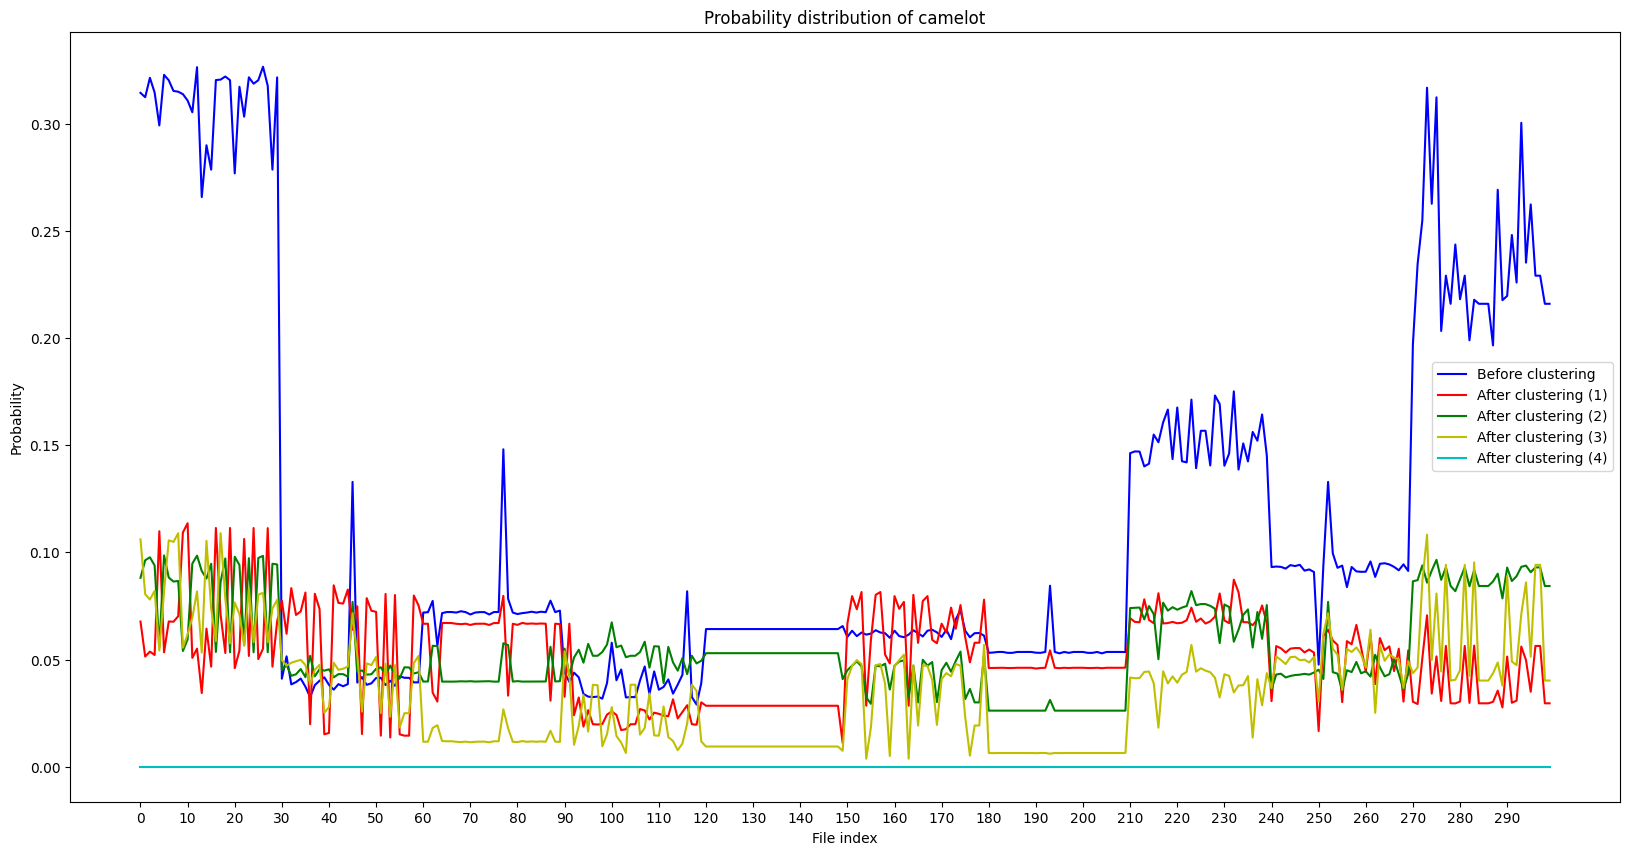

In [210]:
import matplotlib.pyplot as plt


barWidth = 1/6

for key in label_mapping:

    x1 = [prob[key] for i, prob in enumerate(prob_before_cluster_norm)]
    x2 = [0 for i in range(prob_after_cluster_norm.shape[0])]
    x3 = [0 for i in range(prob_after_cluster_norm.shape[0])]
    x4 = [0 for i in range(prob_after_cluster_norm.shape[0])]
    x5 = [0 for i in range(prob_after_cluster_norm.shape[0])]
    for i, prob in enumerate(prob_after_cluster_norm):
        for k, index in enumerate(new_label_mapping[label_mapping[key]]):
            if k == 0:
                x2[i] = prob[index]
            elif k == 1:
                x3[i] = prob[index]
            elif k == 2:
                x4[i] = prob[index]
            elif k == 3:
                x5[i] = prob[index]


    fig= plt.subplots(figsize=(20, 10))

    x = np.arange(300)


    plt.plot(x, x1[:300], color='b', label="Before clustering")
    plt.plot(x, x2[:300], color='r', label="After clustering (1)")
    plt.plot(x, x3[:300], color='g', label="After clustering (2)")
    plt.plot(x, x4[:300], color='y', label="After clustering (3)")
    plt.plot(x, x5[:300], color='c', label="After clustering (4)")
    plt.title(f"Probability distribution of {label_mapping[key]}")
    plt.xlabel("File index")
    plt.ylabel("Probability")
    plt.xticks(np.arange(0, 300, step=10))
    plt.legend()
    plt.show()
    break
    

In [94]:
print(pred_y_before_cluster)
# print(prob_before_cluster)
print(pred_y_after_cluster)
# print(prob_after_cluster)
print(y_test)


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 9, 9, 9, 0, 9, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        0, 9, 9, 9, 9, 0, 9, 0, 9, 9, 9,

In [111]:
from collections import defaultdict

difference_dict = defaultdict(list)
difference_list = []

for i, (before, after, label) in enumerate(zip(pred_y_before_cluster_np, pred_y_after_cluster_np, y_test)):
    if before != label:
        difference_dict[label].append((i))
        difference_list.append((i, before, after, label))
    if after != label:
        difference_dict[label].append((i))
        difference_list.append((i, before, after, label))

print(difference_dict)
# unique of difference_dict list
for key in difference_dict:
    difference_dict[key] = list(set(difference_dict[key], ))
print(difference_dict)
difference_list = list(set(difference_list))
print(difference_list)

defaultdict(<class 'list'>, {0: [13], 1: [31, 36, 36, 45, 45], 2: [77, 77], 3: [91, 91, 108, 111], 4: [149], 8: [250, 250, 252, 262], 9: [273, 273, 275, 275, 288, 293, 293, 295]})
defaultdict(<class 'list'>, {0: [13], 1: [36, 45, 31], 2: [77], 3: [91, 108, 111], 4: [149], 8: [250, 252, 262], 9: [288, 293, 295, 273, 275]})
[(295, 0, 9, 9), (149, 4, 1, 4), (273, 0, 0, 9), (77, 7, 7, 2), (288, 0, 9, 9), (252, 8, 0, 8), (36, 3, 3, 1), (262, 8, 3, 8), (293, 0, 0, 9), (45, 8, 0, 1), (108, 3, 1, 3), (275, 0, 0, 9), (13, 0, 9, 0), (91, 1, 1, 3), (250, 1, 3, 8), (31, 1, 8, 1), (111, 3, 1, 3)]


In [118]:
difference_list = sorted(difference_list, key=lambda x: x[3])
print(difference_list)
unique_diff_label = []
for i in range(len(difference_list)):
    if difference_list[i][3] not in unique_diff_label:
        unique_diff_label.append(difference_list[i][3])
print(unique_diff_label)

[(13, 0, 9, 0), (36, 3, 3, 1), (45, 8, 0, 1), (31, 1, 8, 1), (77, 7, 7, 2), (108, 3, 1, 3), (91, 1, 1, 3), (111, 3, 1, 3), (149, 4, 1, 4), (252, 8, 0, 8), (262, 8, 3, 8), (250, 1, 3, 8), (295, 0, 9, 9), (273, 0, 0, 9), (288, 0, 9, 9), (293, 0, 0, 9), (275, 0, 0, 9)]
[0, 1, 2, 3, 4, 8, 9]


In [119]:
difference_data_before = prob_before_cluster_norm[difference_list[0][0], :]
difference_data_after = prob_after_cluster_norm[difference_list[0][0], :]

for i in range(1, len(difference_list)):
    difference_data_before = np.vstack((difference_data_before, prob_before_cluster_norm[difference_list[i][0], :]))
    difference_data_after = np.vstack((difference_data_after, prob_after_cluster_norm[difference_list[i][0], :]))

print(len(difference_data_before))

            

17


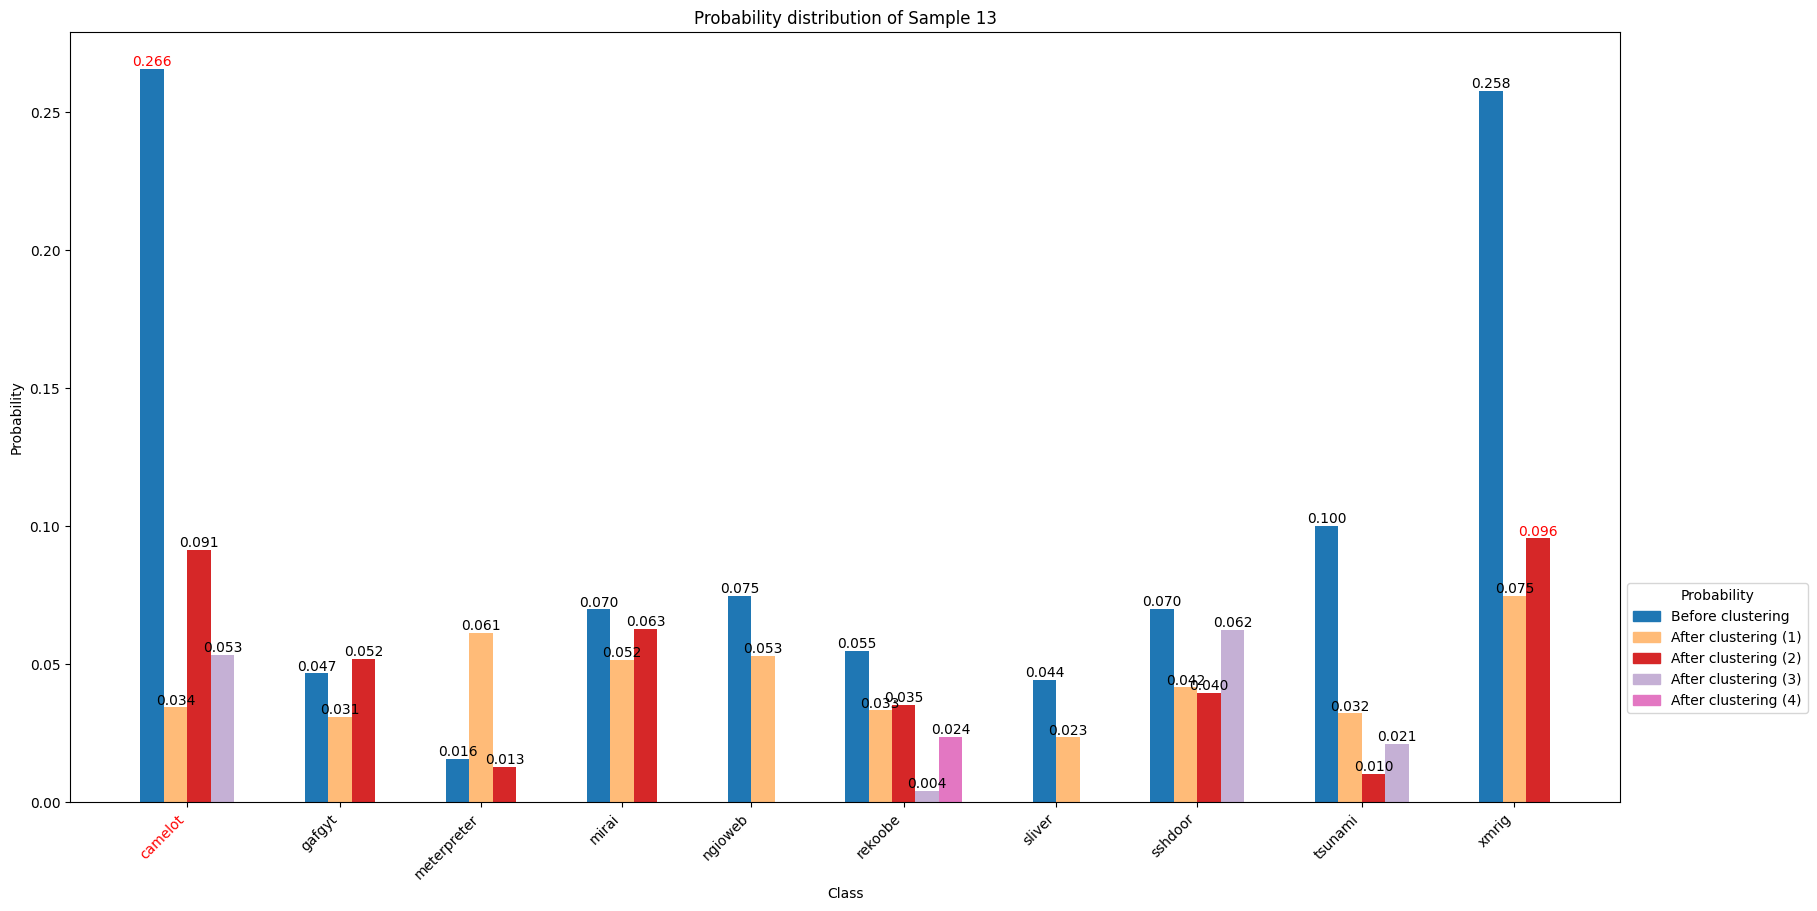

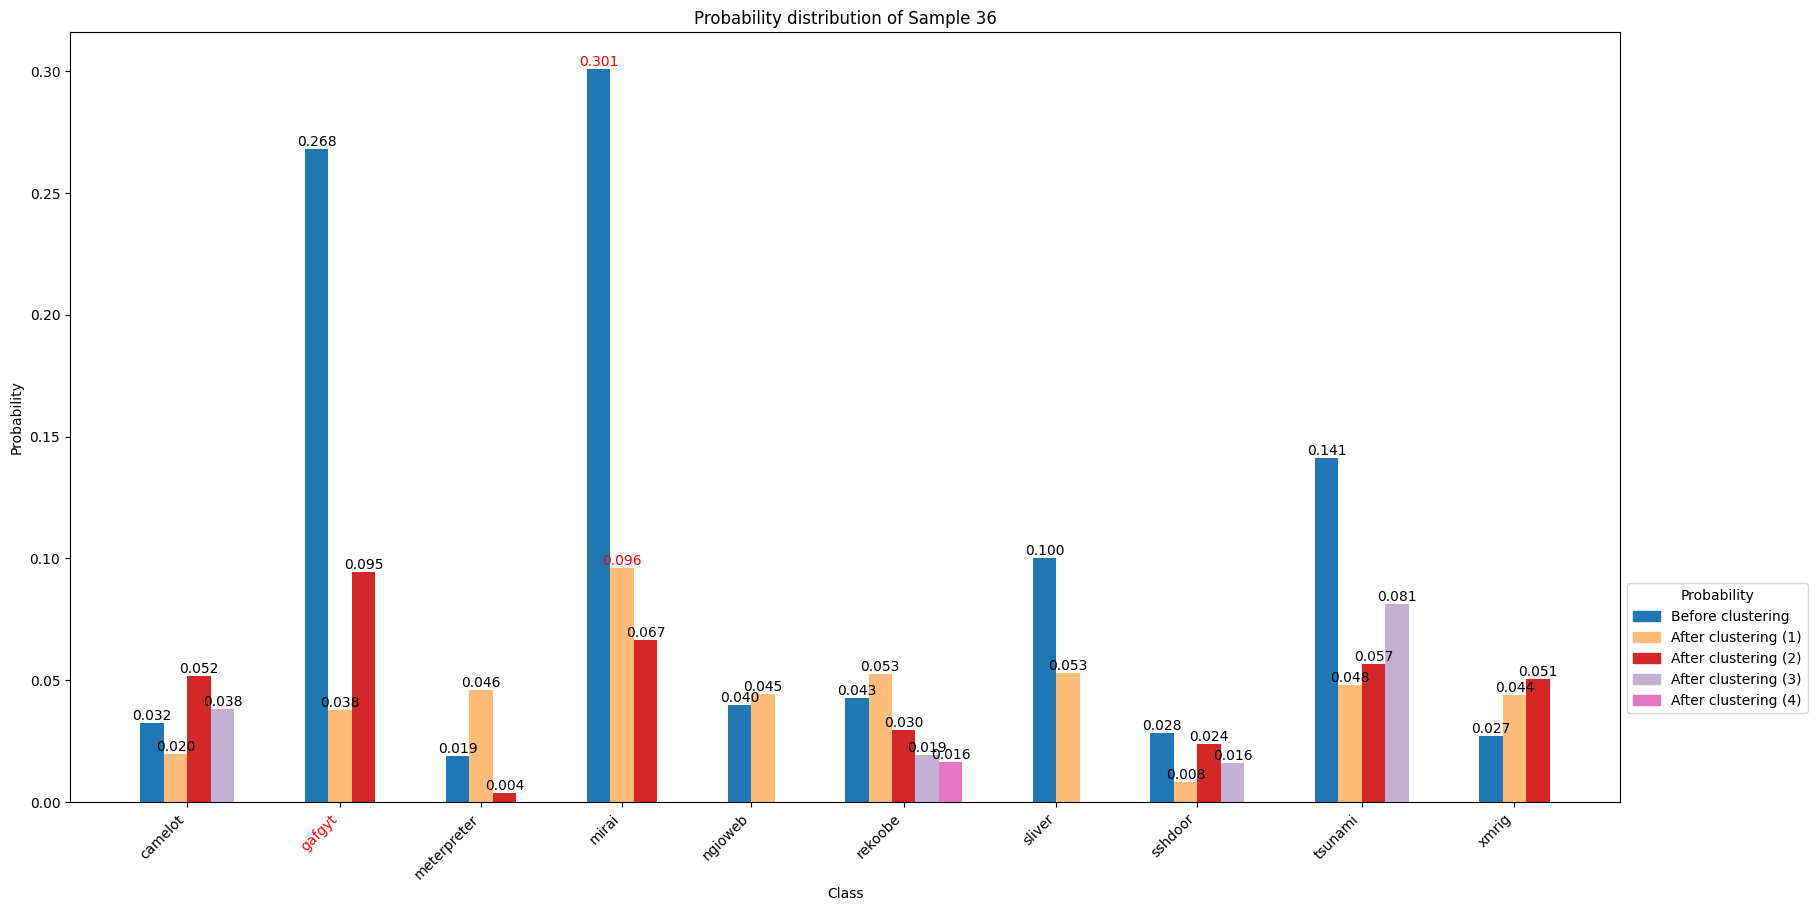

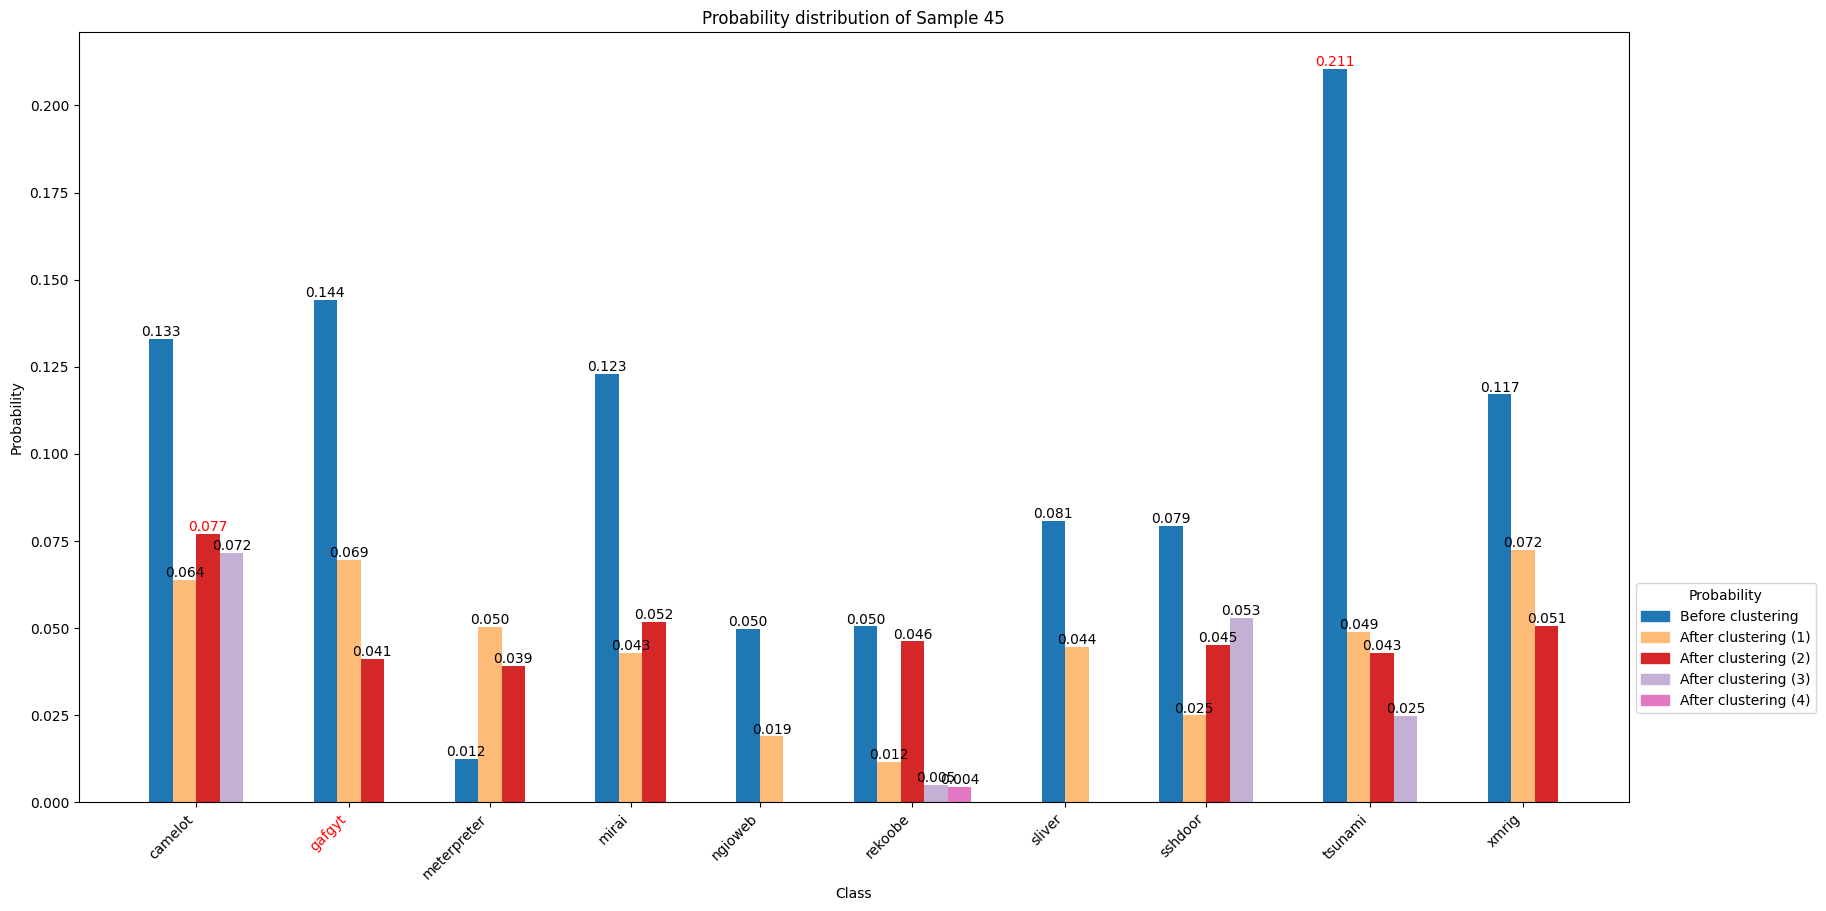

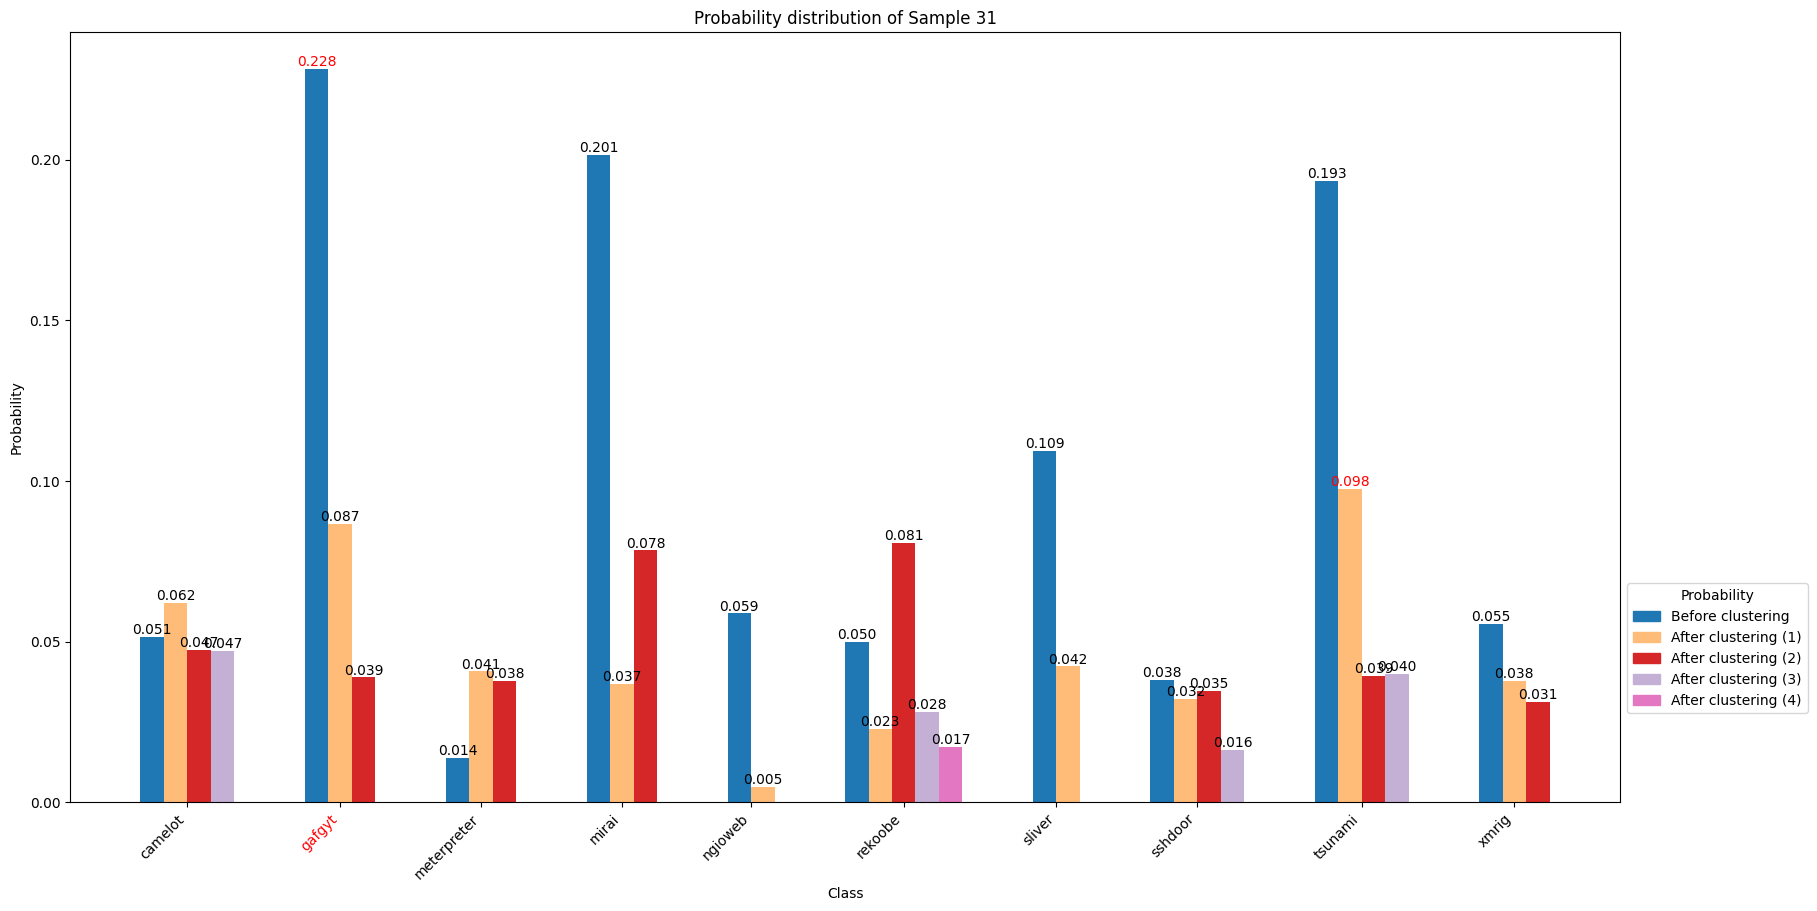

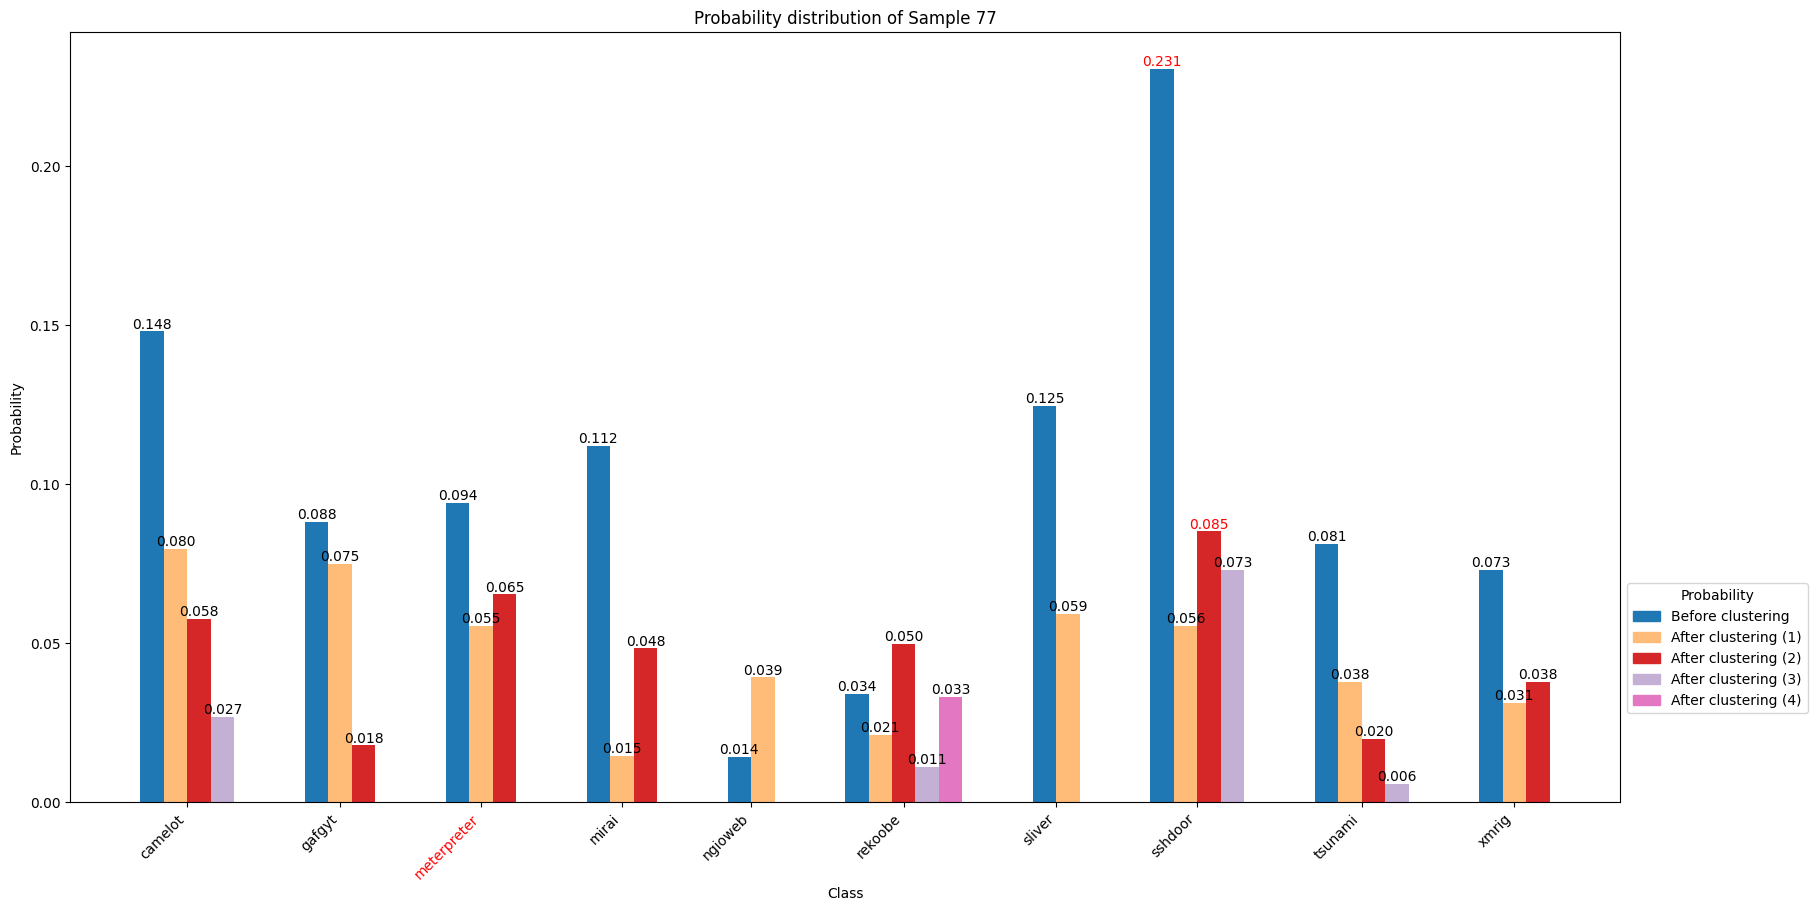

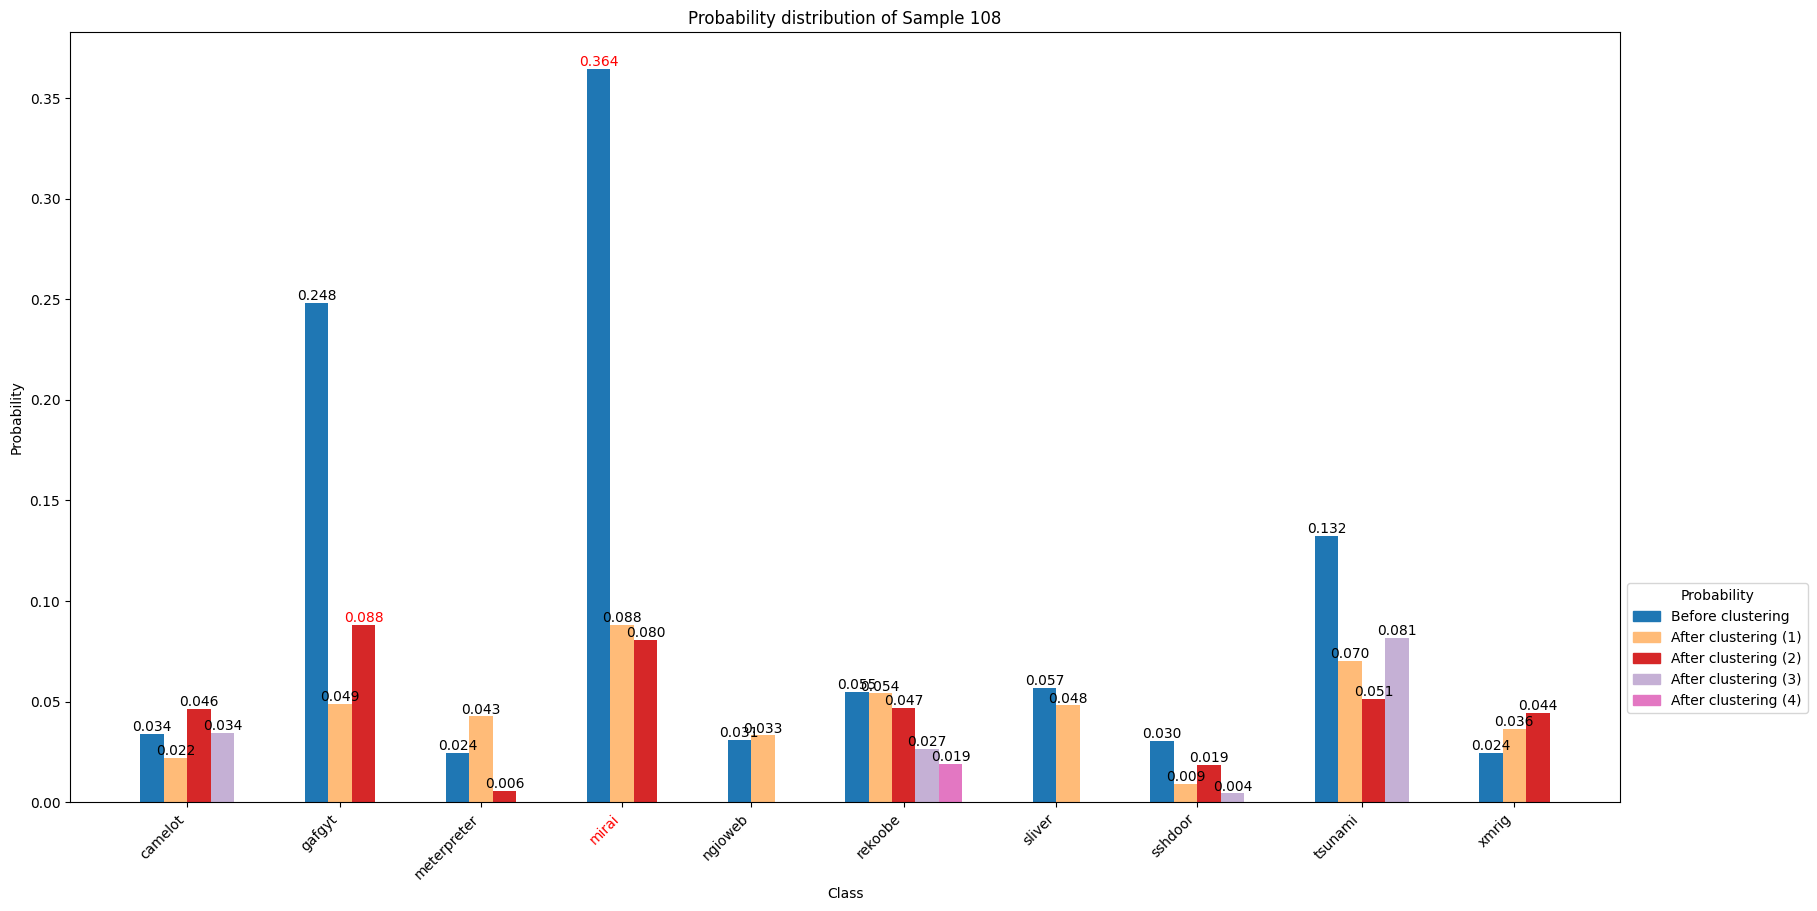

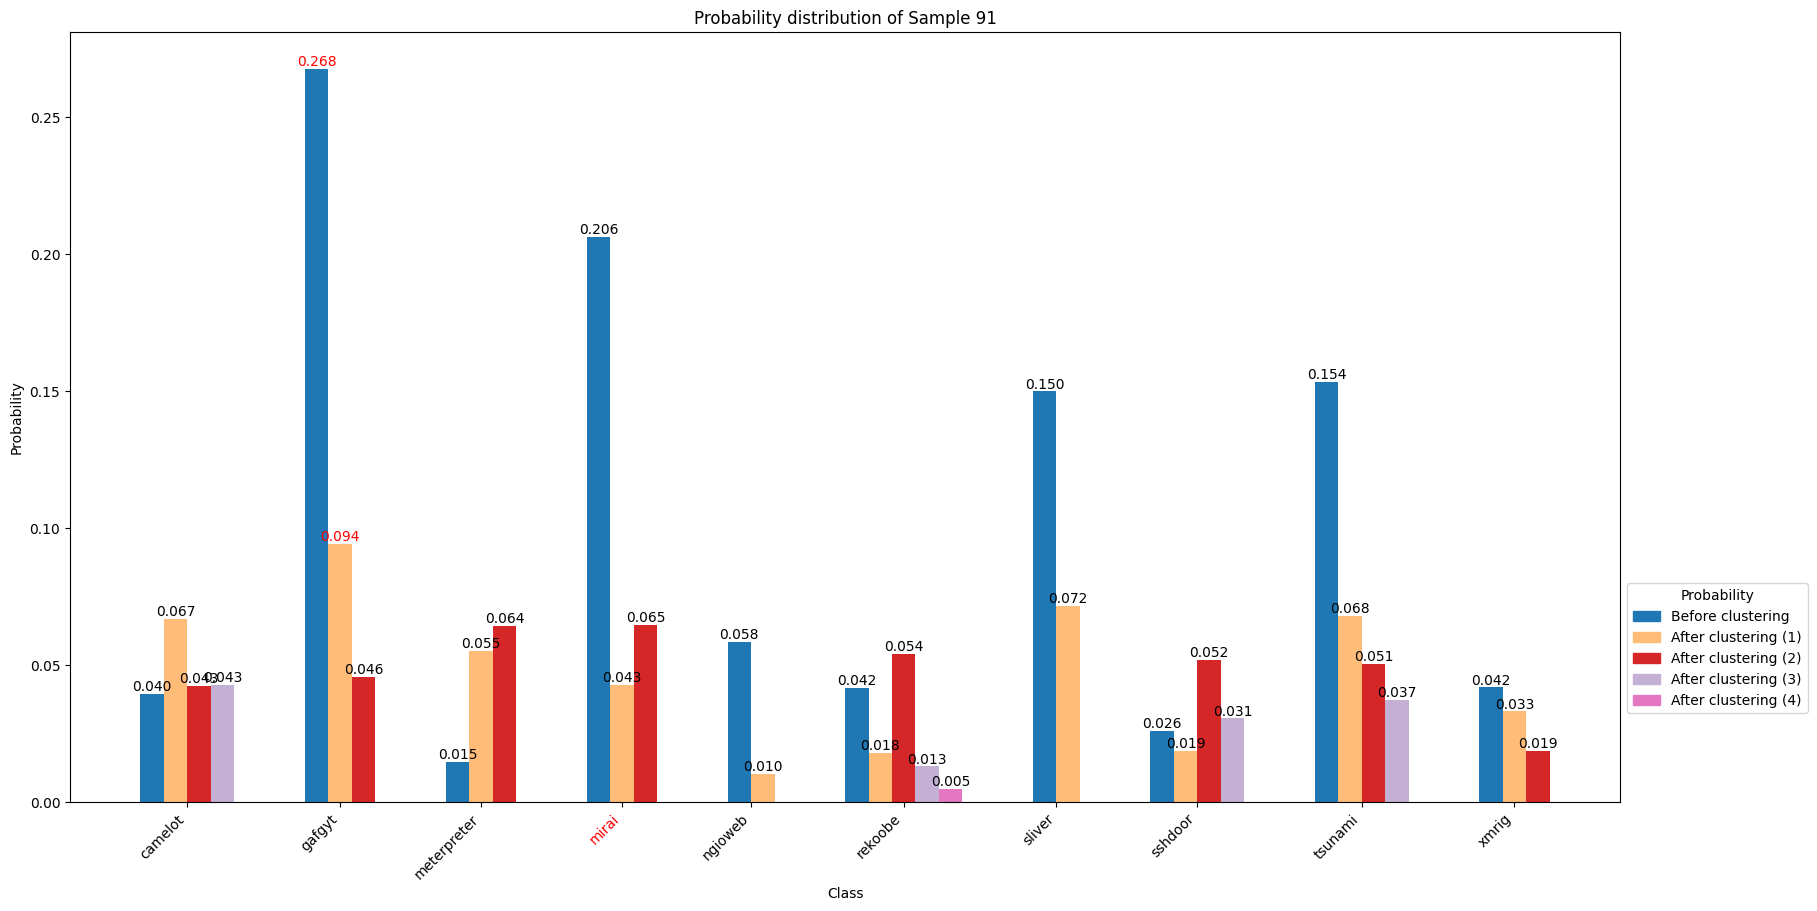

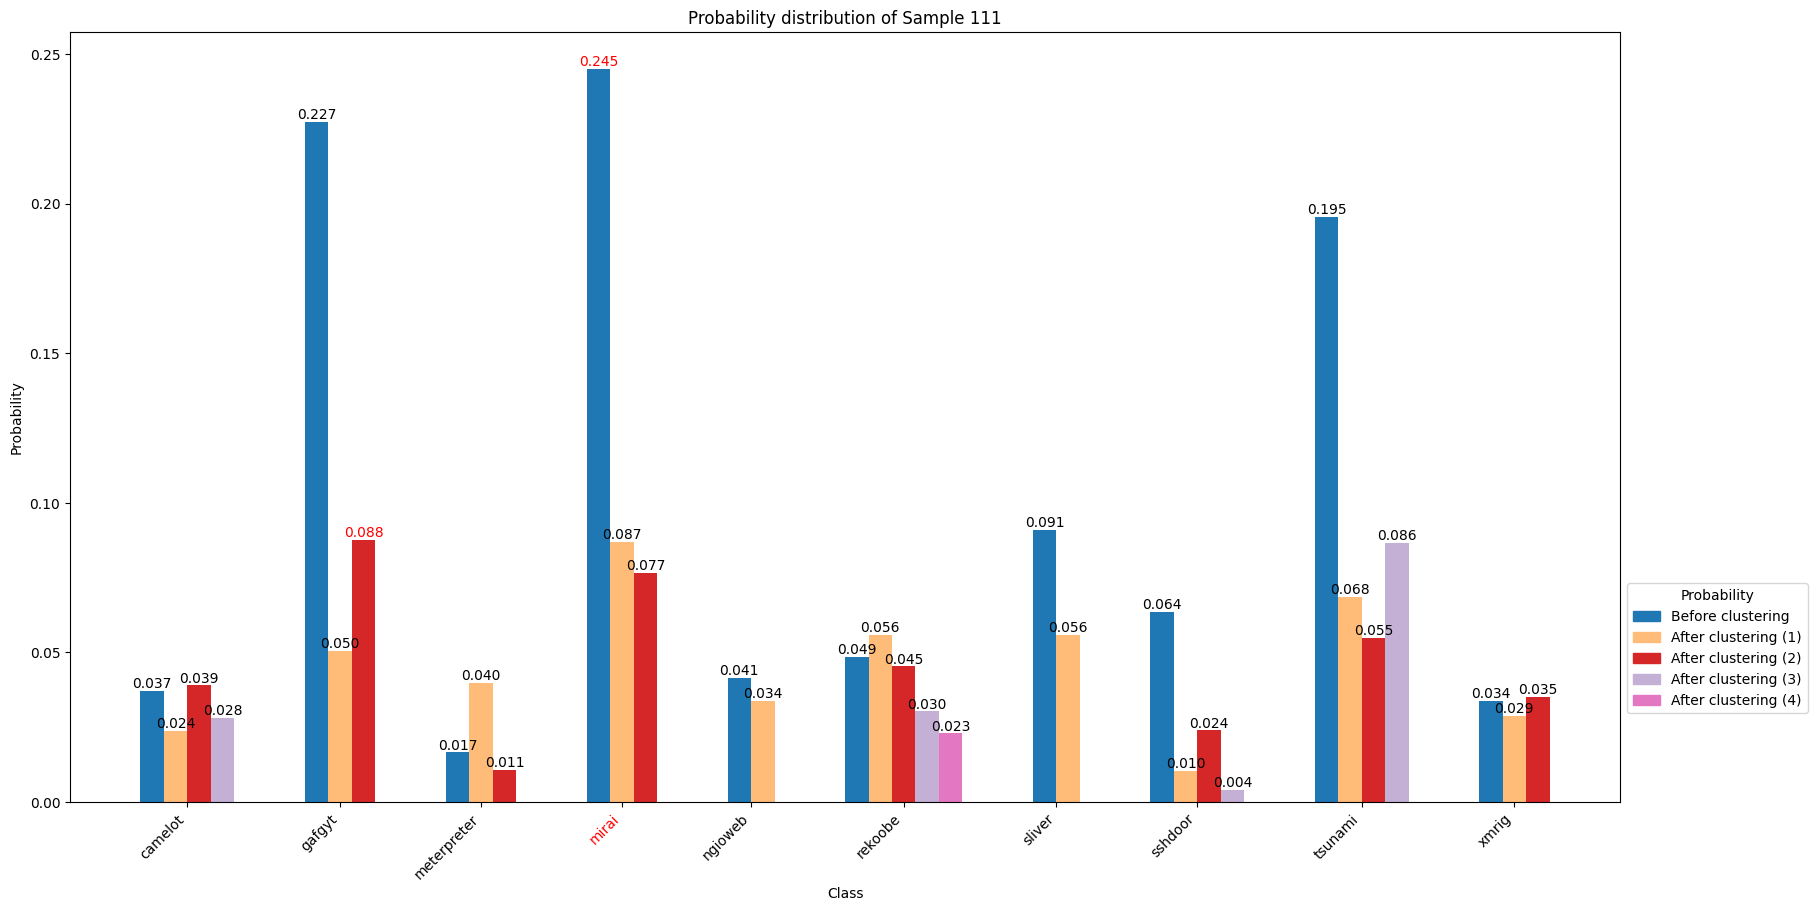

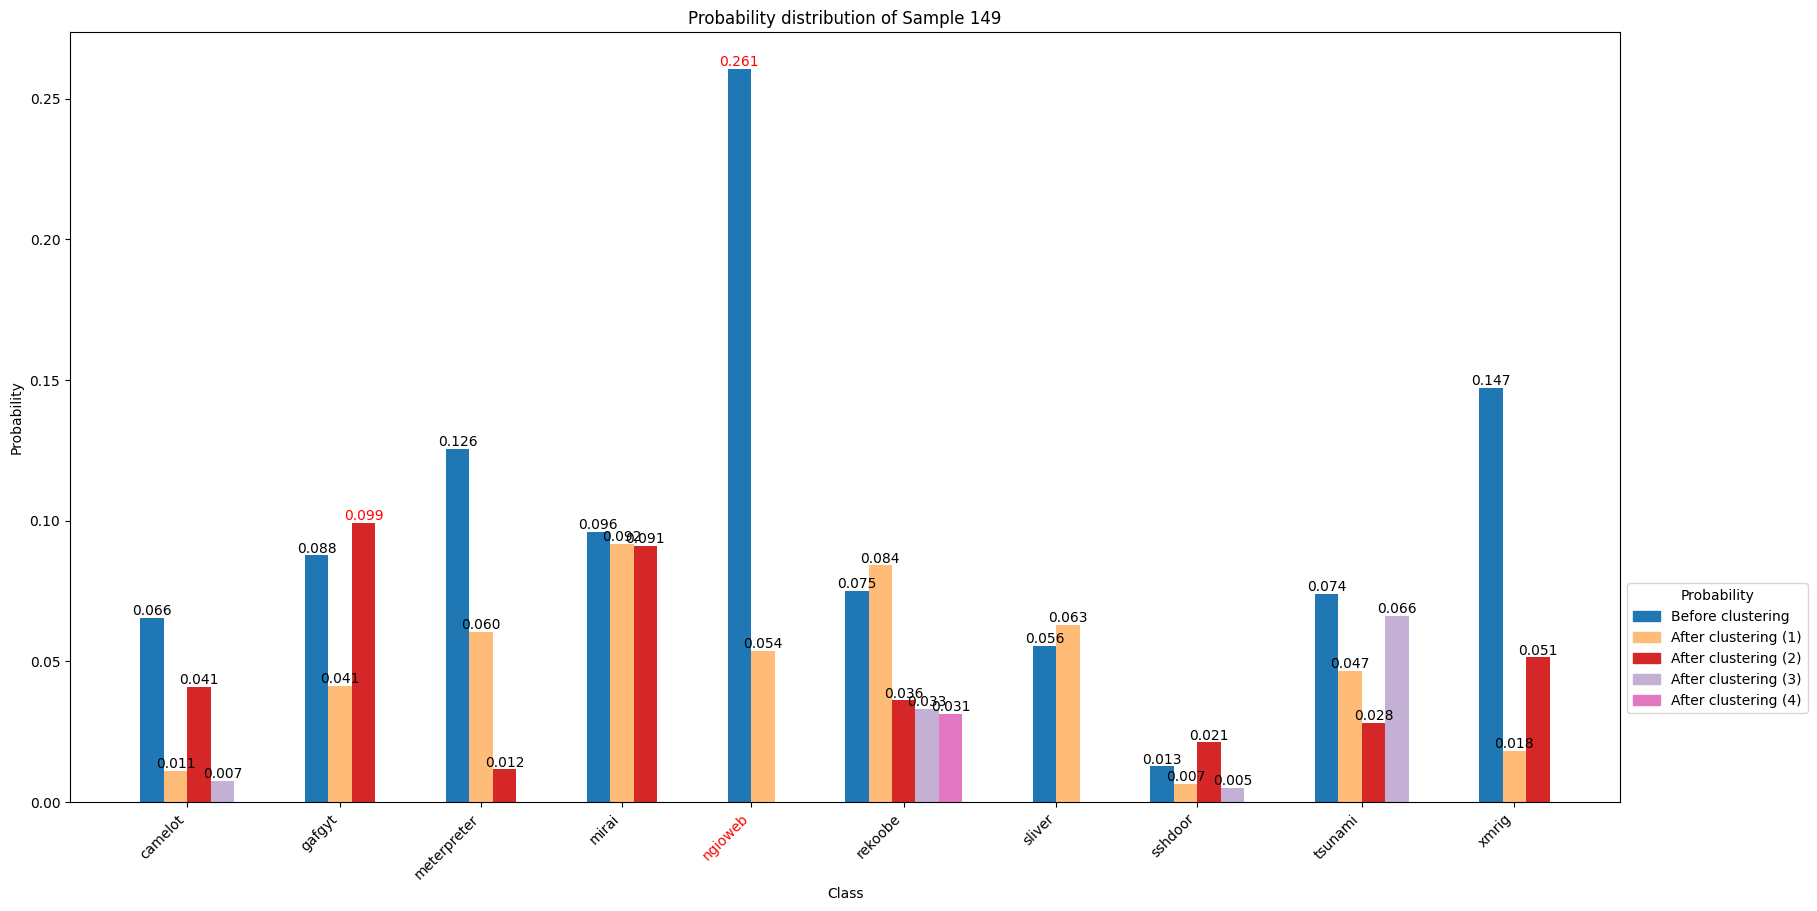

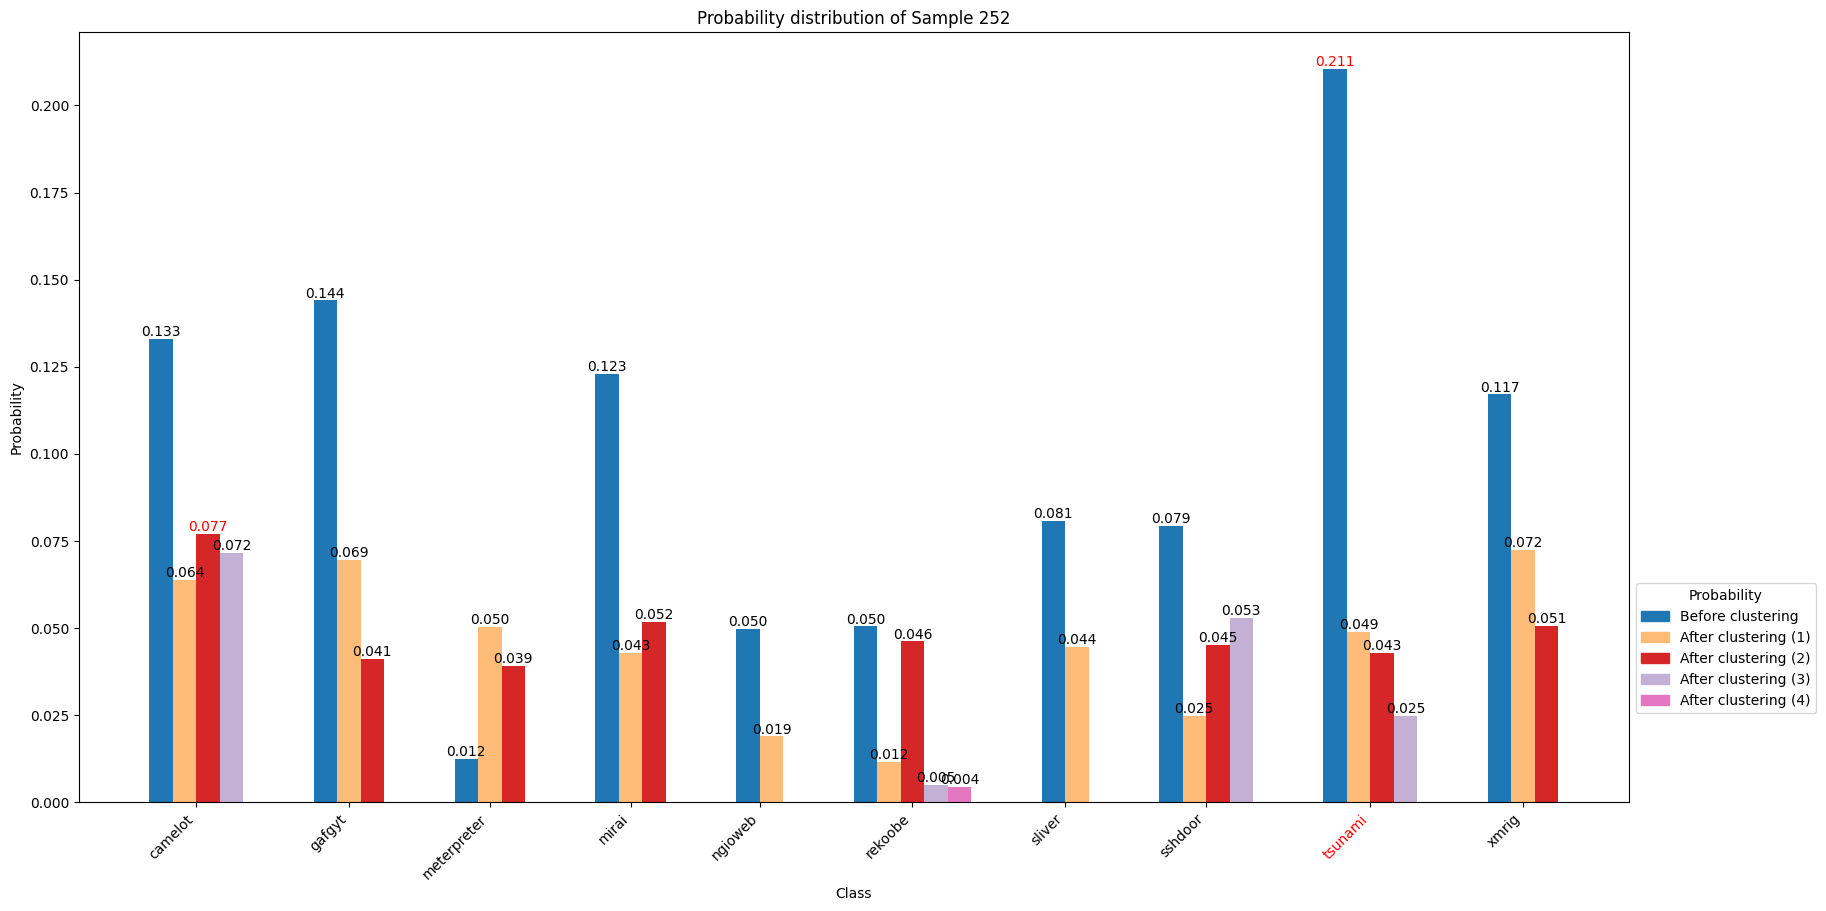

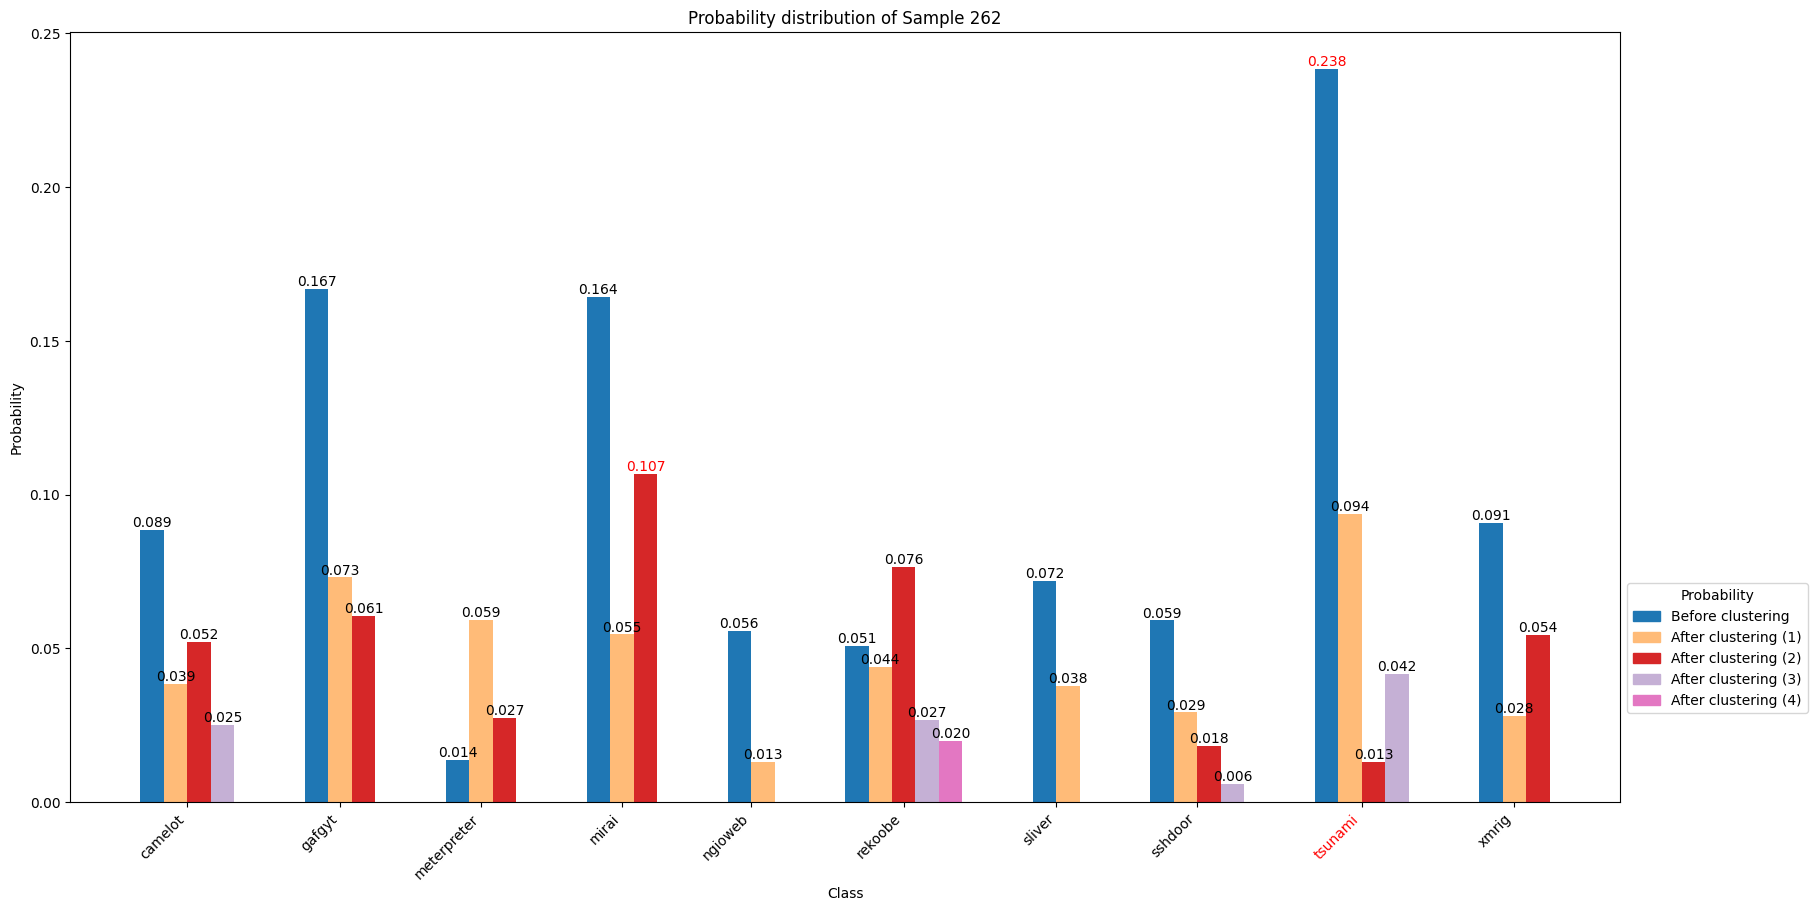

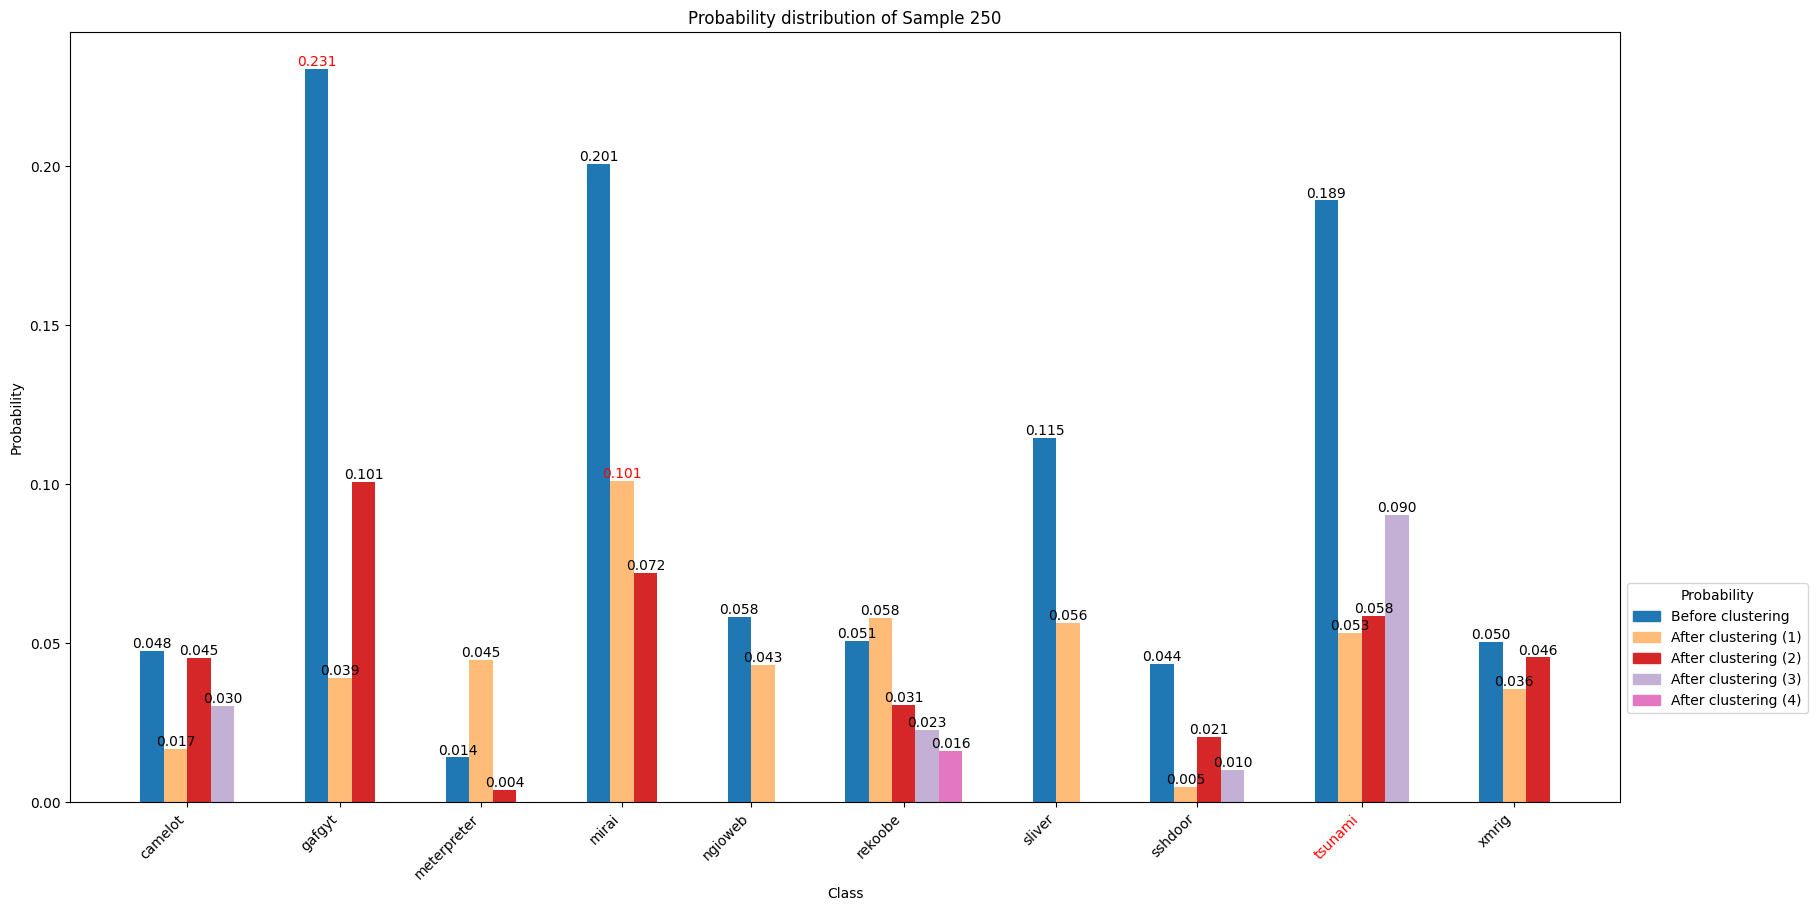

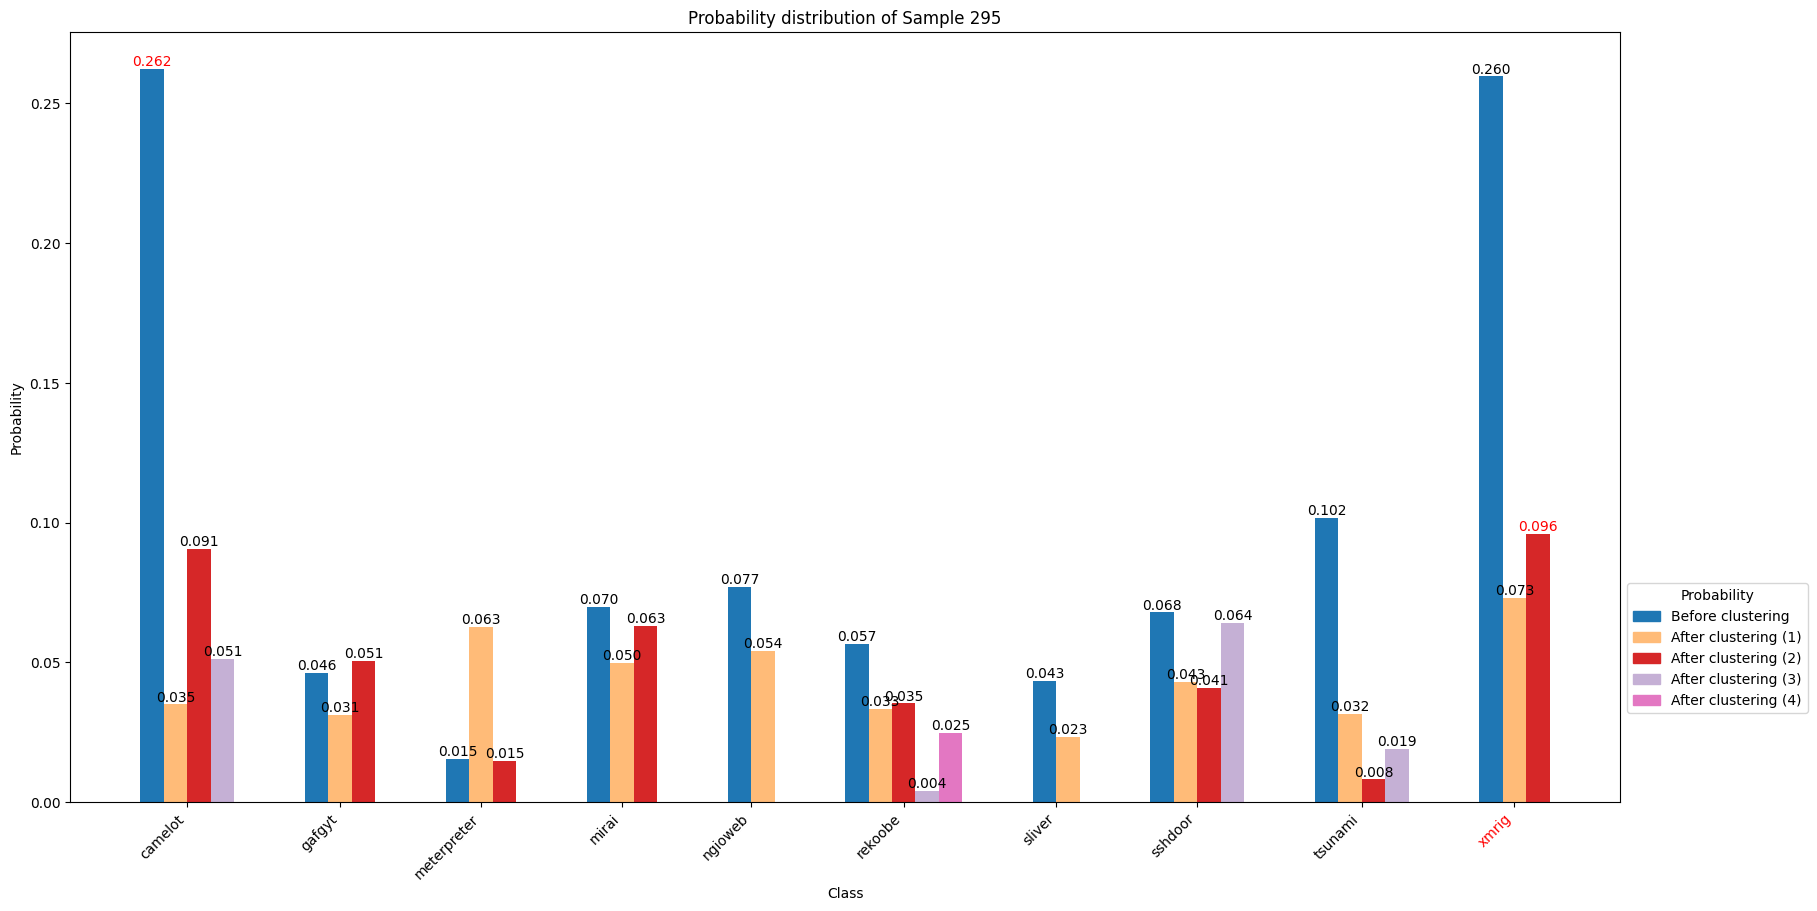

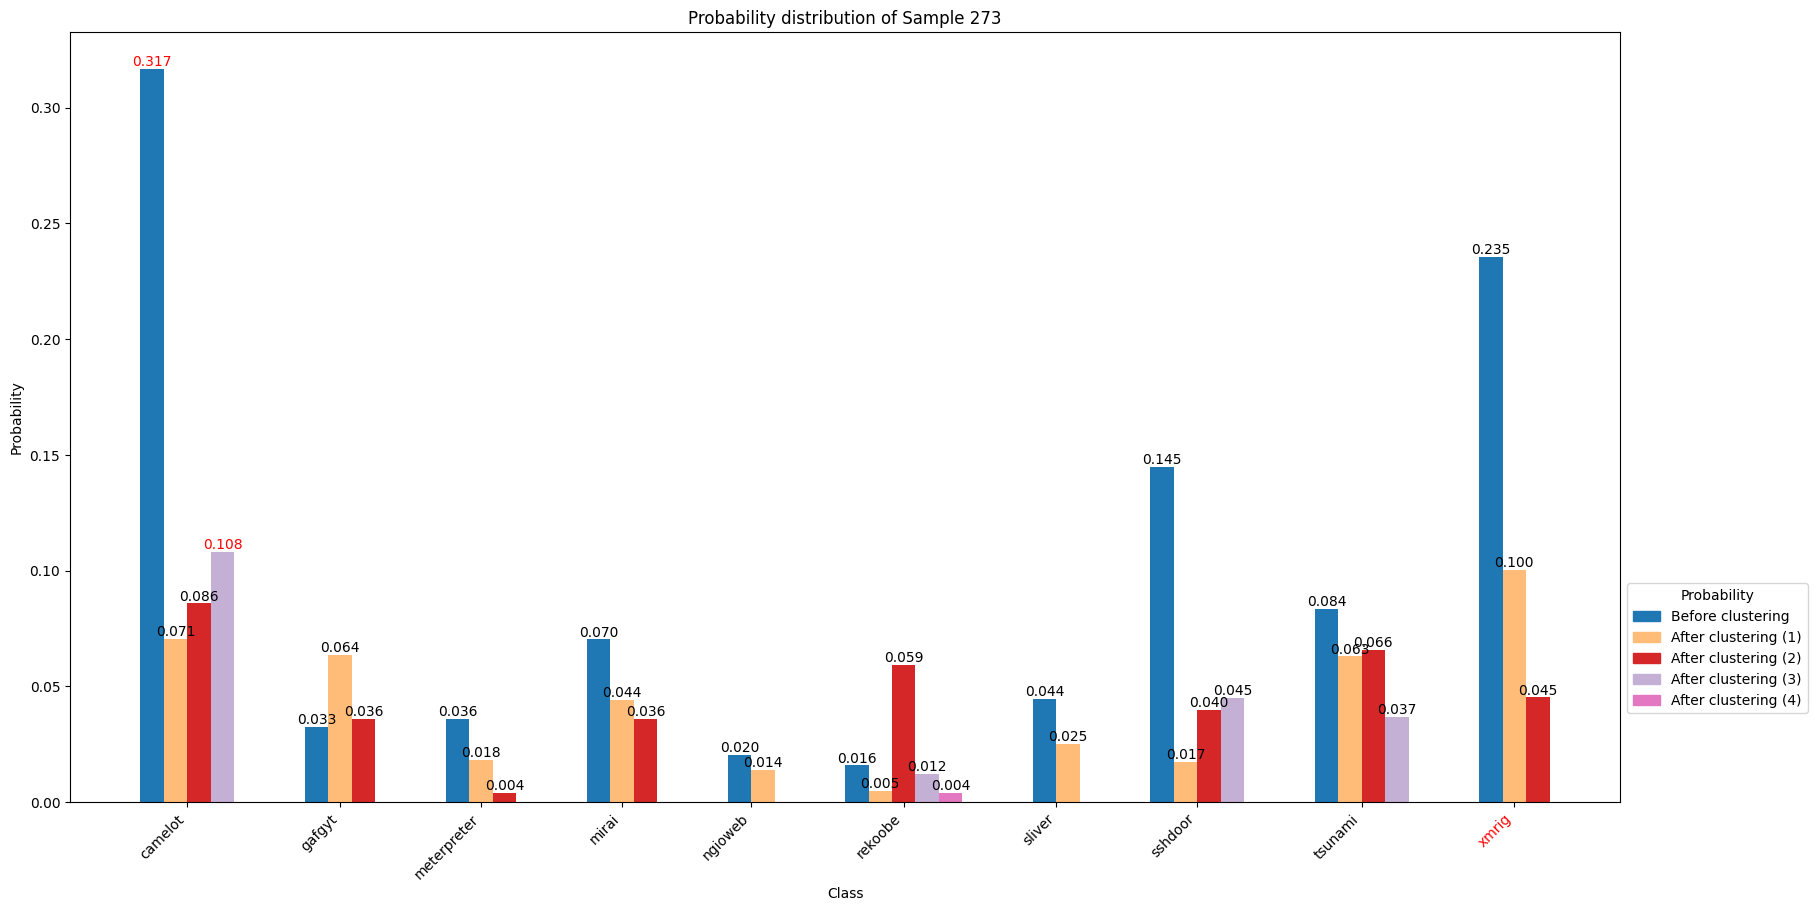

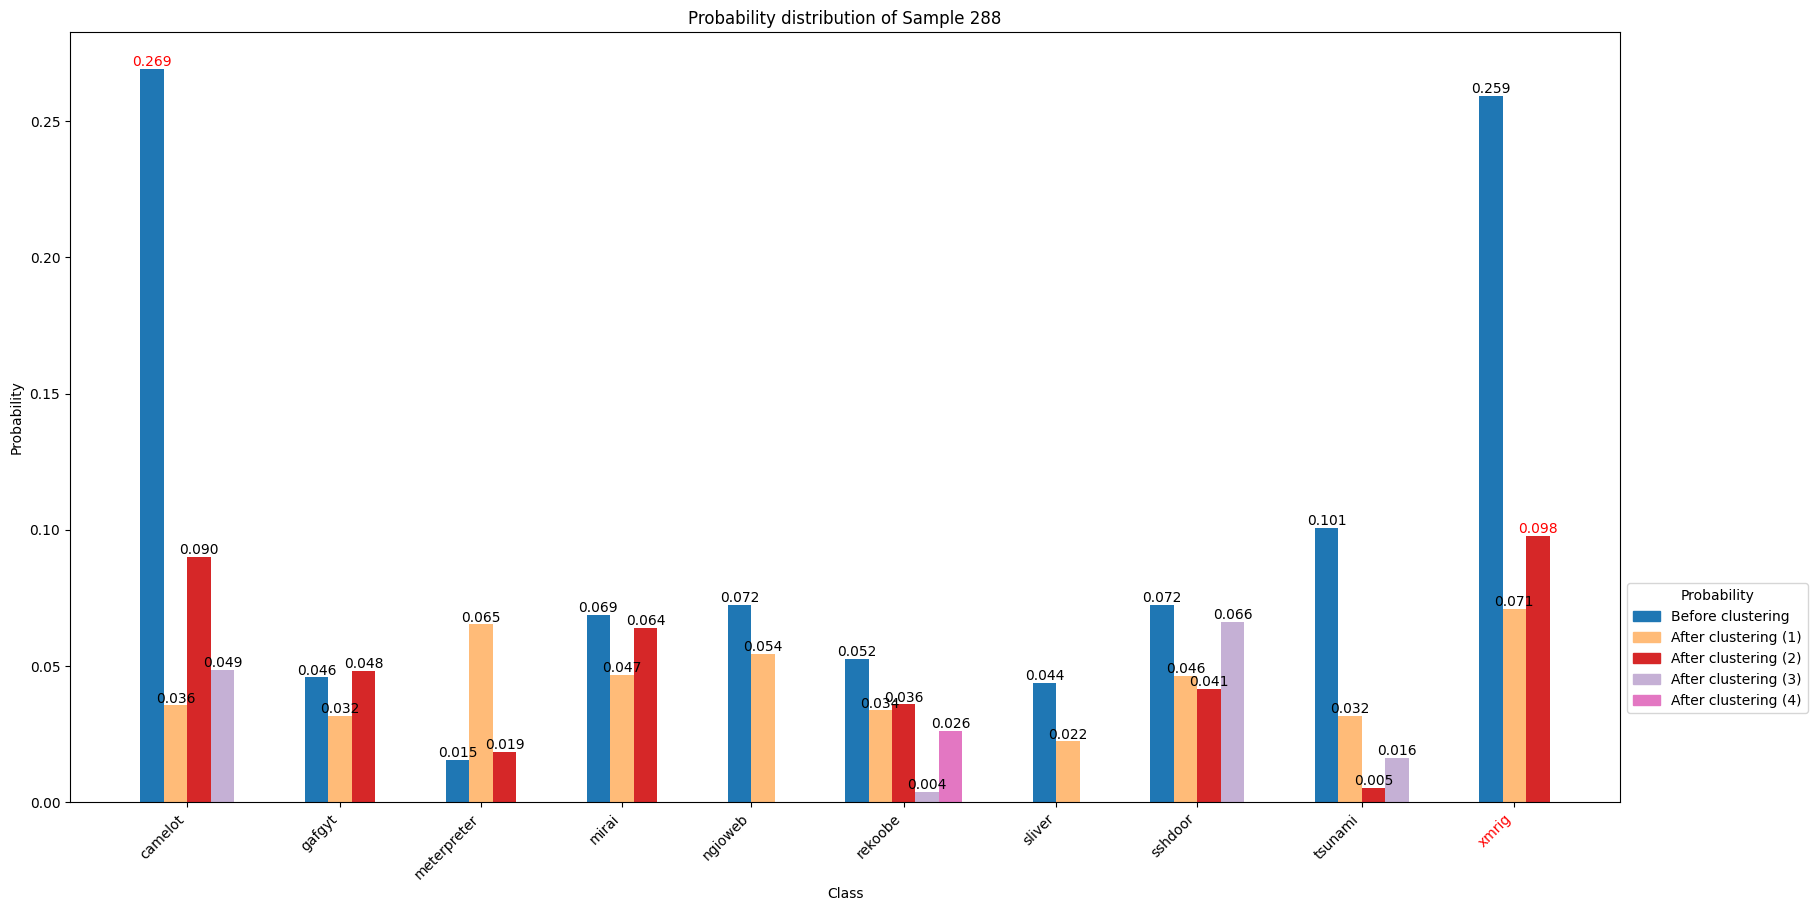

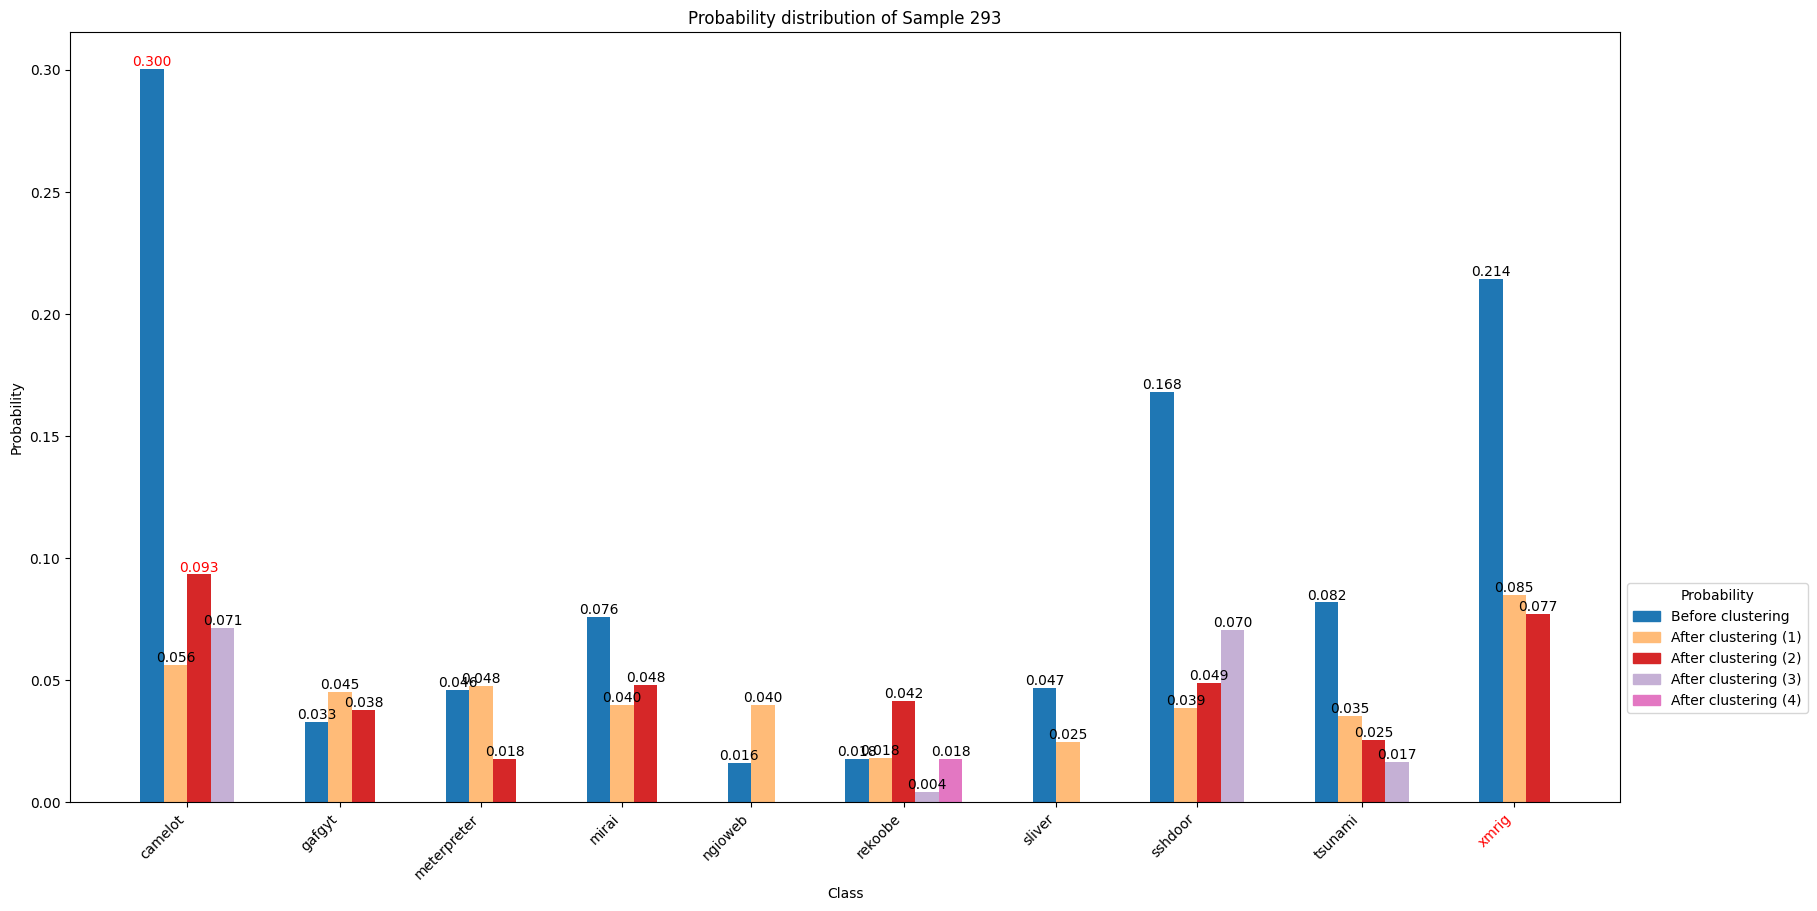

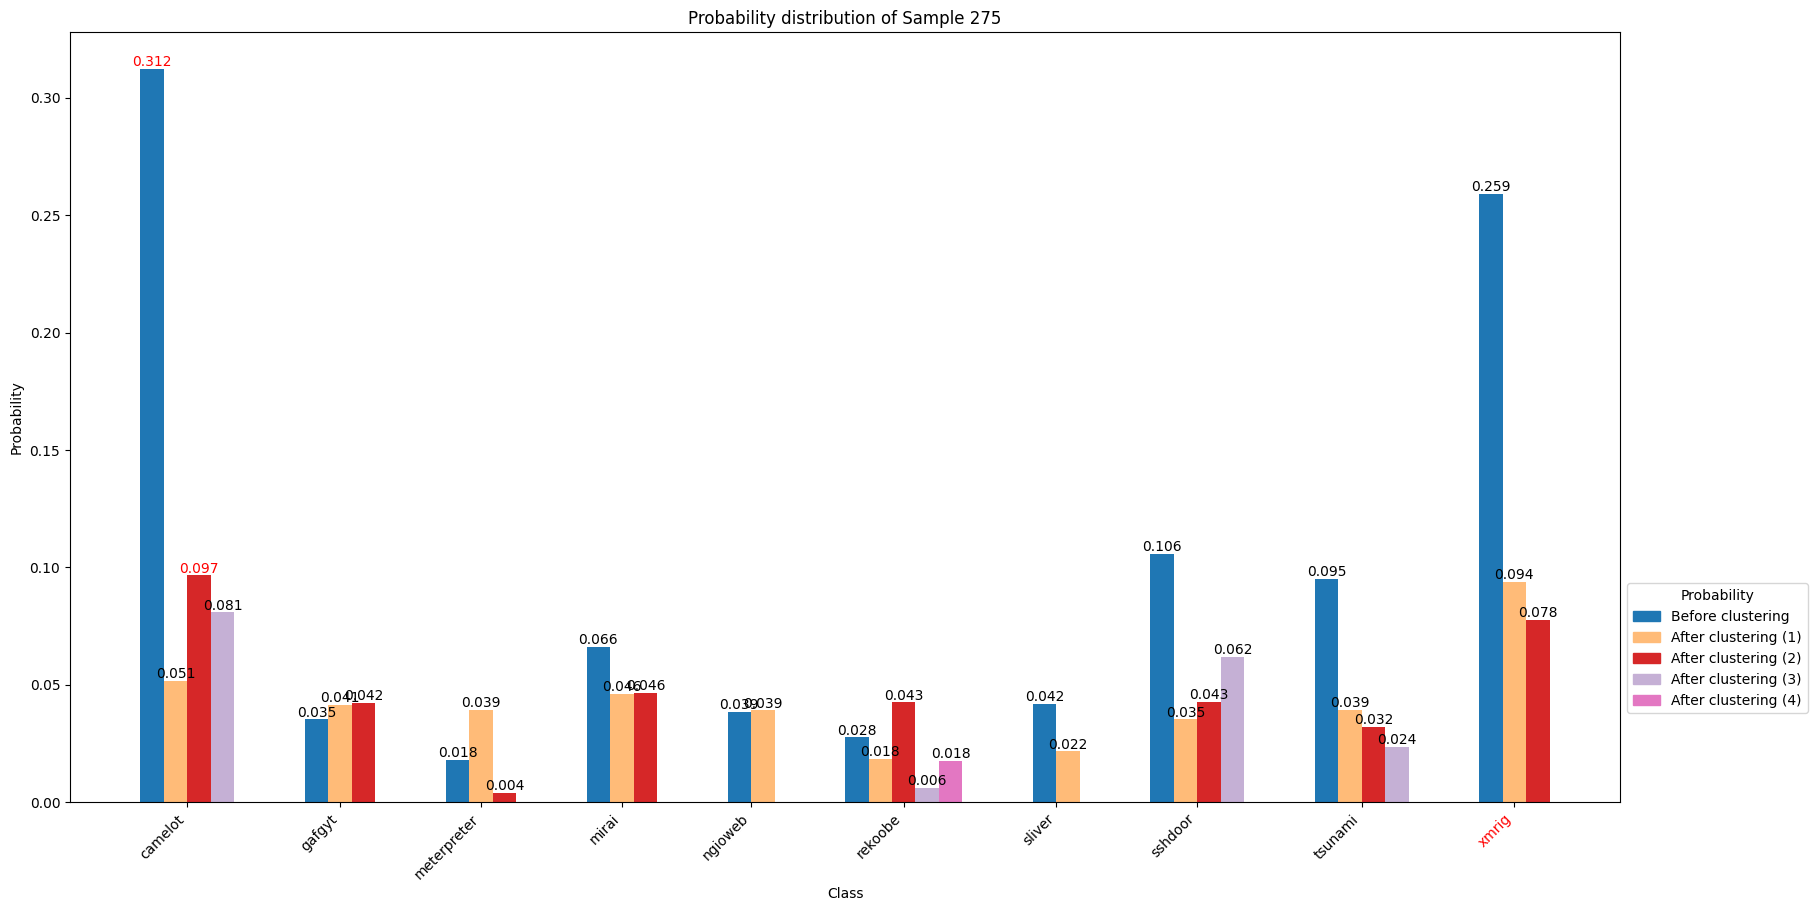

In [211]:


for i, data in enumerate(difference_list):
    barWidth = 0.1
    groupSpace = 0.3

    positions = []
    current_position = 0

    for class_index in new_label_mapping:
        class_position = []
        for j in range(len(new_label_mapping[class_index]) + 1):
            class_position.append(current_position + j * barWidth)
        positions.append(class_position)
        current_position += (len(new_label_mapping[class_index]) + 1) * barWidth + groupSpace

    fig, ax= plt.subplots(figsize=(20, 10))
    cmap = plt.get_cmap("tab20")
    for k, class_index in enumerate(new_label_mapping):
        ax.bar(positions[k][0], difference_data_before[i][k], barWidth, color=cmap(0))
        for j, index in enumerate(new_label_mapping[class_index]):
            ax.bar(positions[k][j + 1], difference_data_after[i][index], barWidth, color=cmap((j+1)*3))

    max_before_cluster = max(difference_data_before[i])
    max_after_cluster = max(difference_data_after[i])

    for rect in ax.patches:
        height = rect.get_height()
        color = 'black'
        if height == max_before_cluster or height == max_after_cluster:
            color = 'red'
        ax.text(rect.get_x() + rect.get_width()/2., height, f"{height:.3f}", ha='center', va='bottom', color=color)

    ax.set_title(f"Probability distribution of Sample {data[0]}")
    ax.set_xlabel("Class")
    ax.set_ylabel("Probability")
    legend_labels = ["Before clustering"] + [f"After clustering ({i+1})" for i in range(4)] 
    handles = [plt.Rectangle((0,0),1,1, color=cmap(i*3)) for i in range(5)] 
    leg1 = ax.legend(handles, legend_labels, loc="center left", bbox_to_anchor=(1, 0.2), title="Probability")
    # ax.add_artist(leg1)
    # legend_labels_2 = ["Label"] + ["Before Cluster Label"] + ["After Cluster Label"]
    # handles_2 = [plt.Rectangle((0,0),1,1, color='red')] + [plt.Rectangle((0,0),1,1, color='blue')] + [plt.Rectangle((0,0),1,1, color='green')]
    # ax.legend(handles_2, legend_labels_2, loc="center left", bbox_to_anchor=(1, 0.5), title="Prediction")


    flattened_positions = [(sublist[0] + sublist[-1]) / 2  for sublist in positions]
    flattened_labels = [key for key in new_label_mapping]
    plt.xticks(flattened_positions, flattened_labels, rotation=45, ha='right')
    [t.set_color('red') for t in ax.xaxis.get_ticklabels() if t.get_text() == label_mapping[data[3]]]
    plt.savefig(f"./pic/{CPU_ARCH}_sample_prob_{data[0]}.png", dpi=300)
    plt.show()
